In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy.stats import shapiro
from numpy.random import randn
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats as stats
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import FloatVector
from lifelines import CoxPHFitter

from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import pairwise_logrank_test
from lifelines.statistics import logrank_test
from sklearn import preprocessing
from lifelines.plotting import add_at_risk_counts

import itertools
stats = importr('stats')

## Preparing data for survival analysis

In [2]:
commonFontsize=8
def config_rcparams():
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3
config_rcparams()

## 2. Coxproportional hazard ratio calculation

In [19]:
import glob, os
os.chdir("/workspace/projects/immunoproteasome/data/tcga_tumor/")
tumor_tissue=[]
for  i in glob.glob("*.tsv"):
    tumor_tissue.append(i)
os.chdir("/workspace/incubator/rahul_project/")

In [20]:
tumor_tissue.remove('THYM.tsv')
tumor_tissue.remove('TGCT.tsv')
tumor_tissue.remove('PCPG.tsv')
tumor_tissue.remove('DLBC.tsv')
tumor_tissue.remove('THCA.tsv')
tumor_tissue.remove('KICH.tsv')

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


ACC.tsv


<lifelines.CoxPHFitter: fitted with 76 total observations, 50 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 76
number of events observed = 26
   partial log-likelihood = -96.12
         time fit was run = 2022-08-25 09:18:25 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.43       0.65       0.23            -0.88             0.01                 0.41                 1.01
Exhaustive T cell   0.76       2.14       0.45            -0.12             1.64                 0.88                 5.16

                      z    p   -log2(p)
covariate                              
immuno_proteosome -1.90 0.06       4.11
Exhaustive T cell  1.69 0.09       3.45
---
Concordance = 0.62
Partial AIC = 196.25
log-likelihood ratio test = 4.56 on 2 df
-log2(p) of ll-ratio test = 3.29

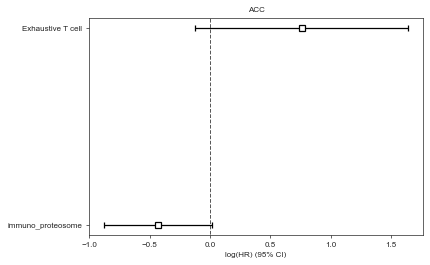

LIHC.tsv


<lifelines.CoxPHFitter: fitted with 348 total observations, 229 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 348
number of events observed = 119
   partial log-likelihood = -604.42
         time fit was run = 2022-08-25 09:18:27 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.05       0.95       0.10            -0.26             0.15                 0.77                 1.16
Exhaustive T cell   0.08       1.09       0.22            -0.34             0.51                 0.71                 1.66

                      z    p   -log2(p)
covariate                              
immuno_proteosome -0.52 0.60       0.73
Exhaustive T cell  0.38 0.70       0.51
---
Concordance = 0.50
Partial AIC = 1212.85
log-likelihood ratio test = 0.29 on 2 df
-log2(p) of ll-ratio test = 0.21

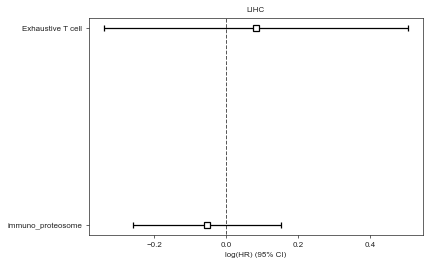

MESO.tsv


<lifelines.CoxPHFitter: fitted with 81 total observations, 12 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 81
number of events observed = 69
   partial log-likelihood = -241.95
         time fit was run = 2022-08-25 09:18:27 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.47       0.63       0.18            -0.82            -0.11                 0.44                 0.90
Exhaustive T cell   0.12       1.12       0.29            -0.45             0.69                 0.63                 1.99

                      z    p   -log2(p)
covariate                              
immuno_proteosome -2.56 0.01       6.57
Exhaustive T cell  0.40 0.69       0.54
---
Concordance = 0.57
Partial AIC = 487.89
log-likelihood ratio test = 7.60 on 2 df
-log2(p) of ll-ratio test = 5.48

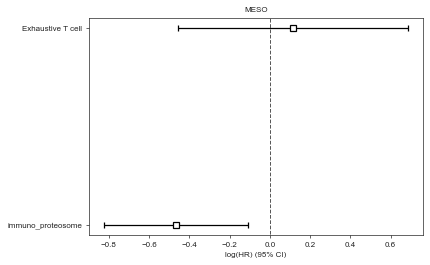

STAD.tsv


<lifelines.CoxPHFitter: fitted with 392 total observations, 245 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 392
number of events observed = 147
   partial log-likelihood = -775.83
         time fit was run = 2022-08-25 09:18:29 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.05       0.95       0.11            -0.27             0.17                 0.76                 1.19
Exhaustive T cell  -0.10       0.91       0.20            -0.48             0.29                 0.62                 1.33

                      z    p   -log2(p)
covariate                              
immuno_proteosome -0.42 0.68       0.57
Exhaustive T cell -0.50 0.62       0.70
---
Concordance = 0.51
Partial AIC = 1555.66
log-likelihood ratio test = 1.08 on 2 df
-log2(p) of ll-ratio test = 0.78

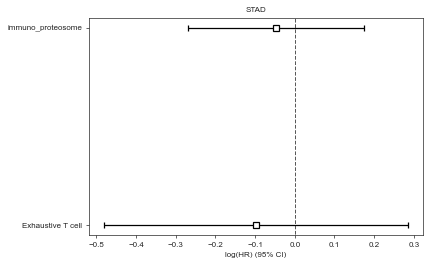

ESCA.tsv


<lifelines.CoxPHFitter: fitted with 164 total observations, 93 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 164
number of events observed = 71
   partial log-likelihood = -298.09
         time fit was run = 2022-08-25 09:18:30 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.02       0.98       0.15            -0.31             0.27                 0.73                 1.31
Exhaustive T cell   0.23       1.26       0.28            -0.32             0.79                 0.73                 2.19

                      z    p   -log2(p)
covariate                              
immuno_proteosome -0.15 0.88       0.18
Exhaustive T cell  0.83 0.40       1.31
---
Concordance = 0.50
Partial AIC = 600.18
log-likelihood ratio test = 0.87 on 2 df
-log2(p) of ll-ratio test = 0.63

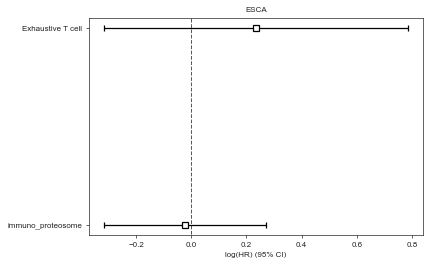

UCS.tsv


<lifelines.CoxPHFitter: fitted with 56 total observations, 22 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 56
number of events observed = 34
   partial log-likelihood = -112.52
         time fit was run = 2022-08-25 09:18:30 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.21       0.81       0.21            -0.62             0.19                 0.54                 1.21
Exhaustive T cell   0.43       1.54       0.40            -0.36             1.22                 0.70                 3.39

                      z    p   -log2(p)
covariate                              
immuno_proteosome -1.03 0.30       1.72
Exhaustive T cell  1.07 0.29       1.81
---
Concordance = 0.59
Partial AIC = 229.03
log-likelihood ratio test = 1.49 on 2 df
-log2(p) of ll-ratio test = 1.07

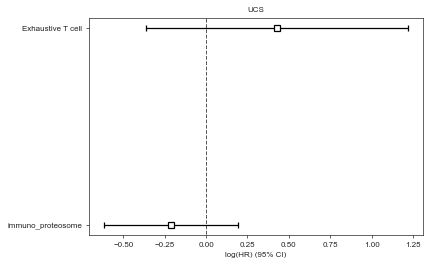

HNSC.tsv


<lifelines.CoxPHFitter: fitted with 494 total observations, 283 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 494
number of events observed = 211
   partial log-likelihood = -1145.28
         time fit was run = 2022-08-25 09:18:32 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.11       1.12       0.10            -0.08             0.31                 0.92                 1.36
Exhaustive T cell  -0.43       0.65       0.19            -0.81            -0.06                 0.44                 0.95

                      z    p   -log2(p)
covariate                              
immuno_proteosome  1.12 0.26       1.94
Exhaustive T cell -2.25 0.02       5.35
---
Concordance = 0.50
Partial AIC = 2294.57
log-likelihood ratio test = 5.51 on 2 df
-log2(p) of ll-ratio test = 3.98

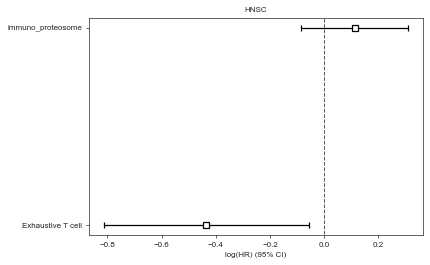

OV.tsv


<lifelines.CoxPHFitter: fitted with 202 total observations, 87 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 202
number of events observed = 115
   partial log-likelihood = -495.29
         time fit was run = 2022-08-25 09:18:33 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.21       0.81       0.12            -0.45             0.03                 0.63                 1.03
Exhaustive T cell   0.35       1.42       0.26            -0.16             0.87                 0.85                 2.38

                      z    p   -log2(p)
covariate                              
immuno_proteosome -1.75 0.08       3.65
Exhaustive T cell  1.35 0.18       2.50
---
Concordance = 0.57
Partial AIC = 994.57
log-likelihood ratio test = 3.06 on 2 df
-log2(p) of ll-ratio test = 2.20

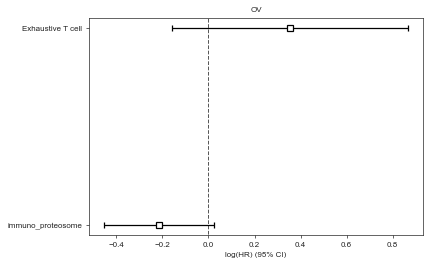

COAD.tsv


<lifelines.CoxPHFitter: fitted with 271 total observations, 206 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 271
number of events observed = 65
   partial log-likelihood = -308.09
         time fit was run = 2022-08-25 09:18:34 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.15       0.86       0.22            -0.58             0.28                 0.56                 1.33
Exhaustive T cell   0.25       1.28       0.29            -0.33             0.83                 0.72                 2.28

                      z    p   -log2(p)
covariate                              
immuno_proteosome -0.67 0.50       1.00
Exhaustive T cell  0.84 0.40       1.32
---
Concordance = 0.50
Partial AIC = 620.18
log-likelihood ratio test = 0.76 on 2 df
-log2(p) of ll-ratio test = 0.54

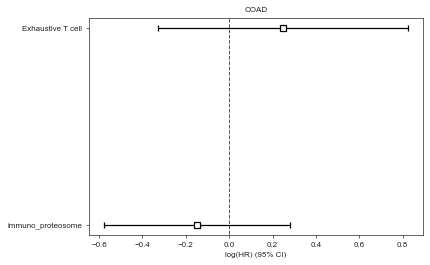

CESC.tsv


<lifelines.CoxPHFitter: fitted with 279 total observations, 212 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 279
number of events observed = 67
   partial log-likelihood = -314.98
         time fit was run = 2022-08-25 09:18:36 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.05       0.95       0.15            -0.34             0.23                 0.71                 1.26
Exhaustive T cell  -0.73       0.48       0.32            -1.35            -0.11                 0.26                 0.90

                      z    p   -log2(p)
covariate                              
immuno_proteosome -0.36 0.72       0.48
Exhaustive T cell -2.31 0.02       5.57
---
Concordance = 0.50
Partial AIC = 633.96
log-likelihood ratio test = 11.20 on 2 df
-log2(p) of ll-ratio test = 8.08

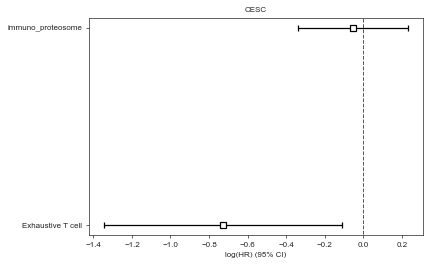

PAAD.tsv


<lifelines.CoxPHFitter: fitted with 152 total observations, 68 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 152
number of events observed = 84
   partial log-likelihood = -351.95
         time fit was run = 2022-08-25 09:18:36 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.39       1.48       0.25            -0.11             0.89                 0.90                 2.42
Exhaustive T cell  -0.08       0.92       0.24            -0.54             0.38                 0.58                 1.46

                      z    p   -log2(p)
covariate                              
immuno_proteosome  1.54 0.12       3.03
Exhaustive T cell -0.35 0.72       0.47
---
Concordance = 0.50
Partial AIC = 707.90
log-likelihood ratio test = 2.42 on 2 df
-log2(p) of ll-ratio test = 1.75

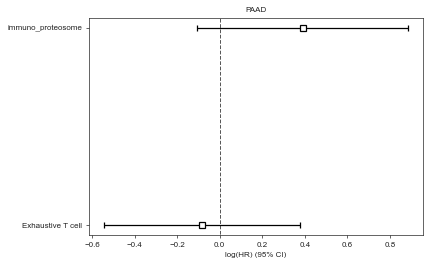

UVM.tsv


<lifelines.CoxPHFitter: fitted with 80 total observations, 57 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 80
number of events observed = 23
   partial log-likelihood = -75.72
         time fit was run = 2022-08-25 09:18:37 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.23       1.26       0.33            -0.42             0.88                 0.65                 2.41
Exhaustive T cell   0.89       2.44       0.85            -0.78             2.57                 0.46                13.01

                     z    p   -log2(p)
covariate                             
immuno_proteosome 0.69 0.49       1.02
Exhaustive T cell 1.05 0.30       1.76
---
Concordance = 0.68
Partial AIC = 155.44
log-likelihood ratio test = 14.05 on 2 df
-log2(p) of ll-ratio test = 10.14

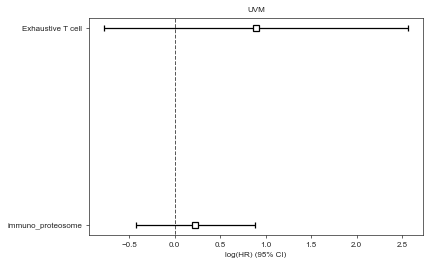

SARC.tsv


<lifelines.CoxPHFitter: fitted with 235 total observations, 149 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 235
number of events observed = 86
   partial log-likelihood = -410.33
         time fit was run = 2022-08-25 09:18:38 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.36       0.70       0.13            -0.61            -0.11                 0.54                 0.90
Exhaustive T cell   0.31       1.37       0.26            -0.20             0.82                 0.82                 2.27

                      z      p   -log2(p)
covariate                                
immuno_proteosome -2.82 <0.005       7.70
Exhaustive T cell  1.21   0.23       2.13
---
Concordance = 0.50
Partial AIC = 824.66
log-likelihood ratio test = 8.01 on 2 df
-log2(p) of ll-ratio test = 5.78

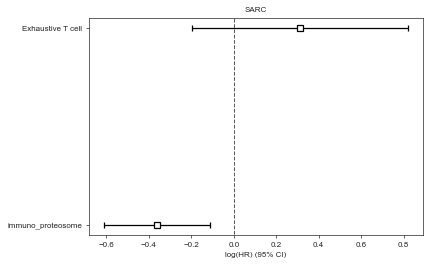

LUSC.tsv


<lifelines.CoxPHFitter: fitted with 457 total observations, 261 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 457
number of events observed = 196
   partial log-likelihood = -1022.15
         time fit was run = 2022-08-25 09:18:40 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.12       1.13       0.10            -0.08             0.33                 0.92                 1.39
Exhaustive T cell  -0.21       0.81       0.20            -0.60             0.19                 0.55                 1.21

                      z    p   -log2(p)
covariate                              
immuno_proteosome  1.17 0.24       2.05
Exhaustive T cell -1.03 0.30       1.72
---
Concordance = 0.51
Partial AIC = 2048.30
log-likelihood ratio test = 1.45 on 2 df
-log2(p) of ll-ratio test = 1.05

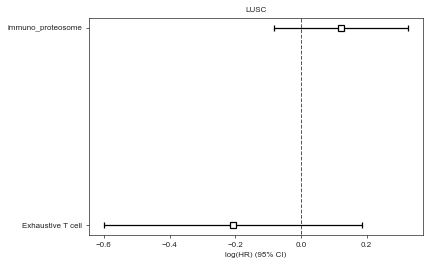

BLCA.tsv


<lifelines.CoxPHFitter: fitted with 396 total observations, 222 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 396
number of events observed = 174
   partial log-likelihood = -920.65
         time fit was run = 2022-08-25 09:18:41 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.18       0.83       0.09            -0.36            -0.00                 0.70                 1.00
Exhaustive T cell   0.08       1.09       0.21            -0.34             0.51                 0.71                 1.66

                      z    p   -log2(p)
covariate                              
immuno_proteosome -2.00 0.05       4.46
Exhaustive T cell  0.39 0.69       0.53
---
Concordance = 0.55
Partial AIC = 1845.30
log-likelihood ratio test = 6.55 on 2 df
-log2(p) of ll-ratio test = 4.72

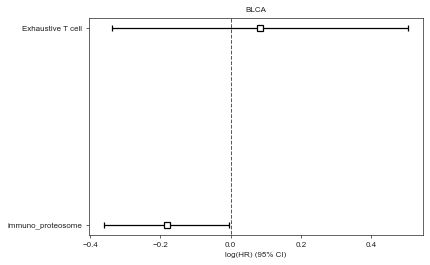

LGG.tsv


<lifelines.CoxPHFitter: fitted with 535 total observations, 394 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 535
number of events observed = 141
   partial log-likelihood = -702.66
         time fit was run = 2022-08-25 09:18:43 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.54       1.72       0.13             0.28             0.80                 1.32                 2.23
Exhaustive T cell   0.11       1.11       0.21            -0.30             0.52                 0.74                 1.68

                     z      p   -log2(p)
covariate                               
immuno_proteosome 4.06 <0.005      14.29
Exhaustive T cell 0.51   0.61       0.71
---
Concordance = 0.50
Partial AIC = 1409.31
log-likelihood ratio test = 25.24 on 2 df
-log2(p) of ll-ratio test = 18.20

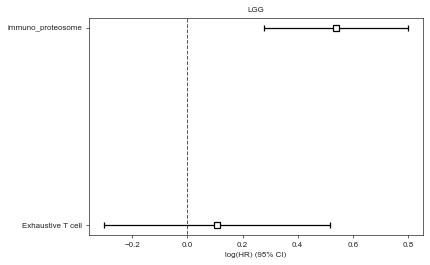

CHOL.tsv


<lifelines.CoxPHFitter: fitted with 36 total observations, 18 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 36
number of events observed = 18
   partial log-likelihood = -52.42
         time fit was run = 2022-08-25 09:18:43 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.03       1.03       0.31            -0.57             0.64                 0.57                 1.89
Exhaustive T cell  -0.32       0.73       0.72            -1.74             1.10                 0.18                 3.01

                      z    p   -log2(p)
covariate                              
immuno_proteosome  0.10 0.92       0.13
Exhaustive T cell -0.44 0.66       0.59
---
Concordance = 0.54
Partial AIC = 108.84
log-likelihood ratio test = 0.22 on 2 df
-log2(p) of ll-ratio test = 0.16

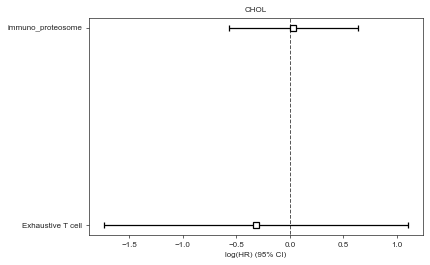

LAML.tsv


<lifelines.CoxPHFitter: fitted with 104 total observations, 36 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 104
number of events observed = 68
   partial log-likelihood = -258.63
         time fit was run = 2022-08-25 09:18:44 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.74       2.11       0.28             0.19             1.30                 1.21                 3.66
Exhaustive T cell   0.51       1.67       0.32            -0.11             1.13                 0.90                 3.10

                     z    p   -log2(p)
covariate                             
immuno_proteosome 2.64 0.01       6.93
Exhaustive T cell 1.63 0.10       3.27
---
Concordance = 0.63
Partial AIC = 521.26
log-likelihood ratio test = 13.37 on 2 df
-log2(p) of ll-ratio test = 9.65

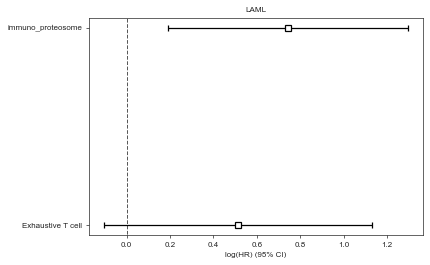

GBM.tsv


<lifelines.CoxPHFitter: fitted with 175 total observations, 33 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 175
number of events observed = 142
   partial log-likelihood = -587.59
         time fit was run = 2022-08-25 09:18:45 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.07       1.08       0.10            -0.13             0.28                 0.88                 1.32
Exhaustive T cell   0.15       1.16       0.19            -0.22             0.51                 0.80                 1.67

                     z    p   -log2(p)
covariate                             
immuno_proteosome 0.70 0.49       1.04
Exhaustive T cell 0.79 0.43       1.21
---
Concordance = 0.50
Partial AIC = 1179.17
log-likelihood ratio test = 2.05 on 2 df
-log2(p) of ll-ratio test = 1.48

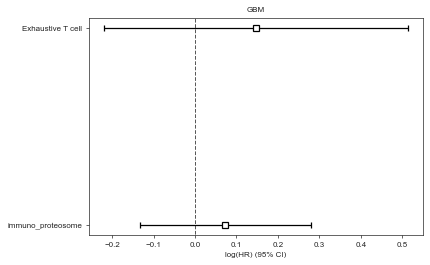

SKCM.tsv


<lifelines.CoxPHFitter: fitted with 421 total observations, 233 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 421
number of events observed = 188
   partial log-likelihood = -945.60
         time fit was run = 2022-08-25 09:18:46 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.07       0.93       0.10            -0.26             0.13                 0.77                 1.14
Exhaustive T cell  -0.72       0.49       0.23            -1.17            -0.28                 0.31                 0.76

                      z      p   -log2(p)
covariate                                
immuno_proteosome -0.67   0.50       1.00
Exhaustive T cell -3.19 <0.005       9.44
---
Concordance = 0.50
Partial AIC = 1895.20
log-likelihood ratio test = 34.92 on 2 df
-log2(p) of ll-ratio test = 25.19

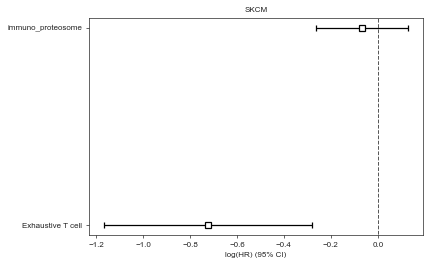

PRAD.tsv


<lifelines.CoxPHFitter: fitted with 485 total observations, 476 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 485
number of events observed = 9
   partial log-likelihood = -41.95
         time fit was run = 2022-08-25 09:18:48 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.12       1.12       0.54            -0.95             1.18                 0.39                 3.26
Exhaustive T cell  -0.55       0.57       0.91            -2.34             1.23                 0.10                 3.43

                      z    p   -log2(p)
covariate                              
immuno_proteosome  0.22 0.83       0.27
Exhaustive T cell -0.61 0.54       0.88
---
Concordance = 0.50
Partial AIC = 87.91
log-likelihood ratio test = 0.42 on 2 df
-log2(p) of ll-ratio test = 0.30

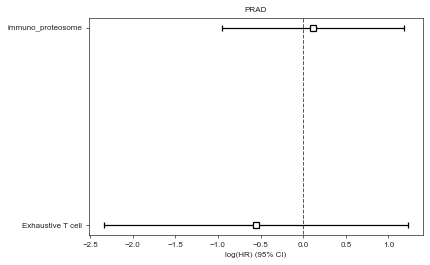

UCEC.tsv


<lifelines.CoxPHFitter: fitted with 166 total observations, 136 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 166
number of events observed = 30
   partial log-likelihood = -124.41
         time fit was run = 2022-08-25 09:18:49 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.01       1.01       0.17            -0.32             0.35                 0.72                 1.42
Exhaustive T cell  -0.33       0.72       0.41            -1.13             0.46                 0.32                 1.59

                      z    p   -log2(p)
covariate                              
immuno_proteosome  0.07 0.94       0.08
Exhaustive T cell -0.82 0.41       1.28
---
Concordance = 0.51
Partial AIC = 252.81
log-likelihood ratio test = 0.80 on 2 df
-log2(p) of ll-ratio test = 0.58

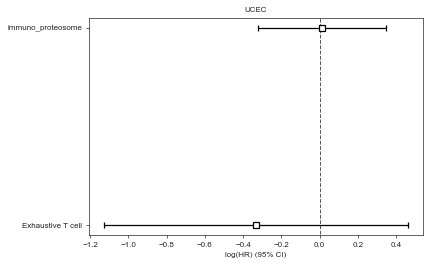

KIRP.tsv


<lifelines.CoxPHFitter: fitted with 273 total observations, 235 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 273
number of events observed = 38
   partial log-likelihood = -180.11
         time fit was run = 2022-08-25 09:18:50 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.35       0.70       0.25            -0.84             0.14                 0.43                 1.15
Exhaustive T cell   1.02       2.77       0.40             0.23             1.81                 1.25                 6.13

                      z    p   -log2(p)
covariate                              
immuno_proteosome -1.42 0.16       2.68
Exhaustive T cell  2.52 0.01       6.40
---
Concordance = 0.50
Partial AIC = 364.22
log-likelihood ratio test = 6.43 on 2 df
-log2(p) of ll-ratio test = 4.64

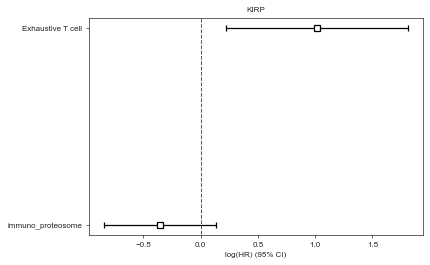

BRCA.tsv


<lifelines.CoxPHFitter: fitted with 1002 total observations, 866 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1002
number of events observed = 136
   partial log-likelihood = -752.38
         time fit was run = 2022-08-25 09:18:54 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.36       0.70       0.12            -0.60            -0.12                 0.55                 0.88
Exhaustive T cell   0.34       1.40       0.24            -0.13             0.80                 0.88                 2.23

                      z      p   -log2(p)
covariate                                
immuno_proteosome -2.97 <0.005       8.40
Exhaustive T cell  1.41   0.16       2.66
---
Concordance = 0.50
Partial AIC = 1508.75
log-likelihood ratio test = 9.72 on 2 df
-log2(p) of ll-ratio test = 7.01

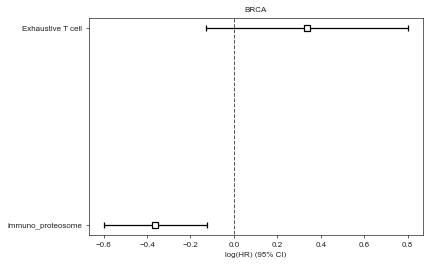

KIRC.tsv


<lifelines.CoxPHFitter: fitted with 347 total observations, 254 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 347
number of events observed = 93
   partial log-likelihood = -476.27
         time fit was run = 2022-08-25 09:18:56 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.43       1.54       0.18             0.08             0.79                 1.08                 2.19
Exhaustive T cell  -0.10       0.90       0.27            -0.63             0.43                 0.53                 1.53

                      z    p   -log2(p)
covariate                              
immuno_proteosome  2.40 0.02       5.94
Exhaustive T cell -0.38 0.70       0.51
---
Concordance = 0.50
Partial AIC = 956.54
log-likelihood ratio test = 8.51 on 2 df
-log2(p) of ll-ratio test = 6.14

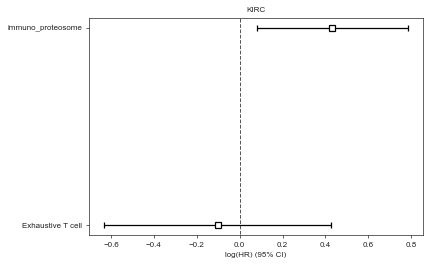

LUAD.tsv


<lifelines.CoxPHFitter: fitted with 492 total observations, 321 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 492
number of events observed = 171
   partial log-likelihood = -914.47
         time fit was run = 2022-08-25 09:18:58 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome   0.14       1.15       0.11            -0.07             0.34                 0.93                 1.41
Exhaustive T cell  -0.26       0.77       0.20            -0.66             0.13                 0.52                 1.14

                      z    p   -log2(p)
covariate                              
immuno_proteosome  1.32 0.19       2.41
Exhaustive T cell -1.29 0.20       2.35
---
Concordance = 0.50
Partial AIC = 1832.94
log-likelihood ratio test = 2.05 on 2 df
-log2(p) of ll-ratio test = 1.48

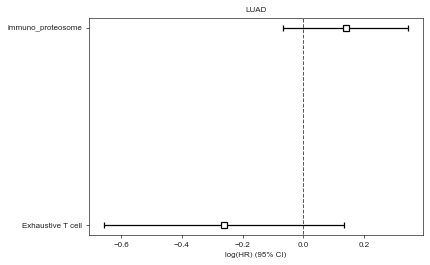

READ.tsv


<lifelines.CoxPHFitter: fitted with 86 total observations, 71 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 86
number of events observed = 15
   partial log-likelihood = -52.21
         time fit was run = 2022-08-25 09:18:59 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
immuno_proteosome  -0.31       0.73       0.46            -1.21             0.59                 0.30                 1.80
Exhaustive T cell   0.78       2.17       0.62            -0.44             1.99                 0.65                 7.31

                      z    p   -log2(p)
covariate                              
immuno_proteosome -0.68 0.49       1.02
Exhaustive T cell  1.25 0.21       2.25
---
Concordance = 0.67
Partial AIC = 108.42
log-likelihood ratio test = 1.79 on 2 df
-log2(p) of ll-ratio test = 1.29

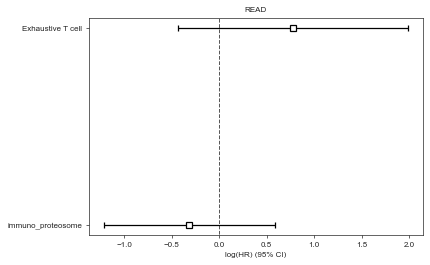

In [26]:
######## tumor purity information####################################################################
tumor_purity_df=pd.read_csv("/workspace/projects/immunoproteasome/data/purity_data/TCGA_mastercalls.abs_tables_JSedit.fixed.txt",sep='\t')
tumor_purity_df['sample_id']=tumor_purity_df['array'].str.split('-').str[0:3].str.join('.')
tumor_purity_df=tumor_purity_df[['purity','sample_id']]
tumor_purity_df=tumor_purity_df.set_index('sample_id')
#### Mutational file ##############################################################################
tumor_mutation_df = pd.read_csv('/workspace/projects/immunoproteasome/data/tcga_cohort.txt', sep="\t",header = 0)
tumor_mutation_df['TMB']=tumor_mutation_df['total']/50
tumor_mutation_df['Tumor_Sample_Barcode']=tumor_mutation_df['Tumor_Sample_Barcode'].str.split('-').str[0:3].str.join('.')
tumor_mutation_df=tumor_mutation_df.set_index('Tumor_Sample_Barcode')
######### stage age gender included into the list of variables####################################
xls_1 = pd.ExcelFile('/workspace/shared/dataset/tcga_exome/tcga_cdr/mmc1.xlsx')
df_1 = xls_1.parse(0)
df_age_sex_grade_info=df_1[['bcr_patient_barcode','type','age_at_initial_pathologic_diagnosis','gender','ajcc_pathologic_tumor_stage','OS','OS.time']]
df_age_sex_grade_info['bcr_patient_barcode']=df_age_sex_grade_info['bcr_patient_barcode'].str.split('-').str[0:3].str.join('.')
df_age_sex_grade_info=df_age_sex_grade_info.set_index('bcr_patient_barcode')
df_age_sex_grade_info['gender']=df_age_sex_grade_info['gender'].replace(['MALE','FEMALE'],[1,2])
df_age_sex_grade_info['ajcc_pathologic_tumor_stage'] = df_age_sex_grade_info['ajcc_pathologic_tumor_stage'].replace(['Stage IA','Stage IB','Stage IIA','Stage IIB','Stage IIC','Stage IIIA','Stage IIIB','Stage IIIC','Stage IVA','Stage IVB','Stage IVC'],['Stage I','Stage I','Stage II','Stage II','Stage II','Stage III','Stage III','Stage III','Stage IV','Stage IV','Stage IV'])
df_age_sex_grade_info['ajcc_pathologic_tumor_stage'] = df_age_sex_grade_info['ajcc_pathologic_tumor_stage'].replace(['Stage I','Stage II','Stage III','Stage IV'],[1,2,3,4])
##################################################################################################

input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"
input_path3="/workspace/projects/immunoproteasome/v1_copy_4/03_output/"
cytotoxic_hazard_summary=[]
tumor_tissue1=[]

for i in range(len(tumor_tissue)):
    print(tumor_tissue[i])
    gene_data_frame=pd.read_csv(input_path1+tumor_tissue[i],sep='\t',index_col=0)
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=gene_data_frame.T+1
    
    log_gene_data_frame=np.log2(gene_data_frame)
    log_gene_data_frame['const_proteosome']=(1/3)*(log_gene_data_frame['PSMB5']+log_gene_data_frame['PSMB6']+log_gene_data_frame['PSMB7'])
    log_gene_data_frame['immuno_proteosome']=(1/3)*(log_gene_data_frame['PSMB8']+log_gene_data_frame['PSMB9']+log_gene_data_frame['PSMB10'])
    
    immune_gsva_score=pd.read_csv(input_path3+'GSVA_'+'immune_cells_'+tumor_tissue[i],sep='\t')
    
    df3=pd.merge(log_gene_data_frame[['const_proteosome','immuno_proteosome']],immune_gsva_score.T,left_index=True, right_index=True)
    df_immunogenicity_proteasome_immune_cells_score1=pd.merge(df3,tumor_purity_df,left_index=True, right_index=True)
    df_immunogenicity_proteasome_immune_cells_score2=pd.merge(df_age_sex_grade_info,df_immunogenicity_proteasome_immune_cells_score1,left_index=True, right_index=True)
    df_immunogenicity_proteasome_immune_cells_score3=pd.merge(tumor_mutation_df,df_immunogenicity_proteasome_immune_cells_score2,left_index=True, right_index=True)
    
    variables=['immuno_proteosome','Regulatory T cell','Cytotoxic cells','Exhaustive T cell','OS', 'OS.time']
    #-------- keep immuno_proteaosme and change the other varaible iteratively to collect the HR ratio
    df_subset=df_immunogenicity_proteasome_immune_cells_score3[['immuno_proteosome','Exhaustive T cell','OS','OS.time']] ### Put different varaible along with Immunoproteasome score
    #-------------------------------------------------------------------------------------------------------------------
    df_subset=df_subset.dropna()
    
    try:
        cph = CoxPHFitter()
        cph.fit(df_subset, duration_col='OS.time', event_col='OS')
        cph.print_summary()
        cytotoxic_hazard_summary.append(list(cph.summary.iloc[0]))
        tumor_tissue1.append(tumor_tissue[i].split('.')[0])
        cph.plot()
        plt.title(tumor_tissue[i].split('.')[0])
        plt.show()
    except ZeroDivisionError:
        pass

#df_tmp_immuno=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno.index=tumor_tissue1
#df_tmp_immuno['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno['p'])), method = 'BH')
#df_tmp_immuno['error_bar']=np.abs(((df_tmp_immuno['coef upper 95%'])-(df_tmp_immuno['coef lower 95%']))/2)

#df_tmp_immuno_cytox=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_cytox.index=tumor_tissue1
#df_tmp_immuno_cytox['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_cytox['p'])), method = 'BH')
#df_tmp_immuno_cytox['error_bar']=np.abs(((df_tmp_immuno_cytox['coef upper 95%'])-(df_tmp_immuno_cytox['coef lower 95%']))/2)

#df_tmp_immuno_reg=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_reg.index=tumor_tissue1
#df_tmp_immuno_reg['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_reg['p'])), method = 'BH')
#df_tmp_immuno_reg['error_bar']=np.abs(((df_tmp_immuno_reg['coef upper 95%'])-(df_tmp_immuno_reg['coef lower 95%']))/2)

df_tmp_immuno_Exhausted_T_cell_score=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
df_tmp_immuno_Exhausted_T_cell_score.index=tumor_tissue1
df_tmp_immuno_Exhausted_T_cell_score['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_Exhausted_T_cell_score['p'])), method = 'BH')
df_tmp_immuno_Exhausted_T_cell_score['error_bar']=np.abs(((df_tmp_immuno_Exhausted_T_cell_score['coef upper 95%'])-(df_tmp_immuno_Exhausted_T_cell_score['coef lower 95%']))/2)


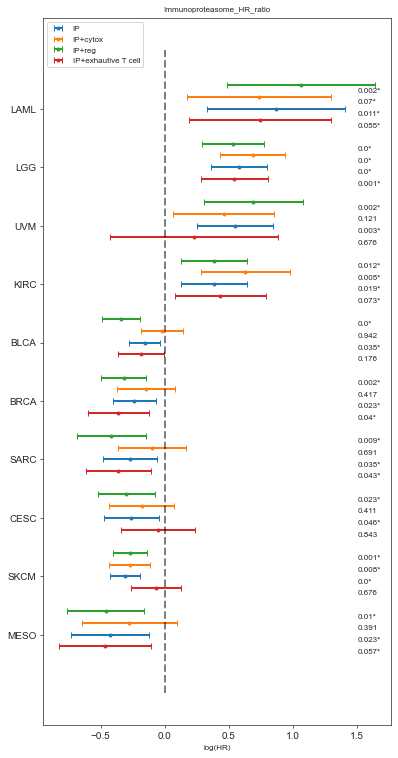

In [27]:
tt_list=['MESO','SKCM','CESC','SARC','BRCA','BLCA','KIRC','UVM','LGG','LAML']

df_tmp_immuno=df_tmp_immuno.sort_values(by=['coef'])
df_tmp_immuno=df_tmp_immuno.loc[tt_list]
df_tmp_immuno['y_value']=np.array(range(1,11))

df_tmp_immuno_cytox=df_tmp_immuno_cytox.reindex(df_tmp_immuno.index)
df_tmp_immuno_cytox=df_tmp_immuno_cytox.loc[tt_list]
df_tmp_immuno_cytox['y_value']=np.array(range(1,11))

df_tmp_immuno_reg=df_tmp_immuno_reg.reindex(df_tmp_immuno.index)
df_tmp_immuno_reg=df_tmp_immuno_reg.loc[tt_list]
df_tmp_immuno_reg['y_value']=np.array(range(1,11))

df_tmp_immuno_Exhausted_T_cell_score=df_tmp_immuno_Exhausted_T_cell_score.reindex(df_tmp_immuno.index)
df_tmp_immuno_Exhausted_T_cell_score=df_tmp_immuno_Exhausted_T_cell_score.loc[tt_list]
df_tmp_immuno_Exhausted_T_cell_score['y_value']=np.array(range(1,11))


x = np.array(df_tmp_immuno['coef'])
y = np.array(df_tmp_immuno['y_value'])
err=np.array(df_tmp_immuno['error_bar'])
y_ticks_labels = list(df_tmp_immuno.index)
l1 = np.arange(1,11,1)

x_1 = np.array(df_tmp_immuno_cytox['coef'])
y_1 = np.array(df_tmp_immuno_cytox['y_value'])
y_1=y_1+0.20
err_1=np.array(df_tmp_immuno_cytox['error_bar'])
y_ticks_labels_1 = list(df_tmp_immuno_cytox.index)
l1_1 = np.arange(1,11,1)

x_2 = np.array(df_tmp_immuno_reg['coef'])
y_2 = np.array(df_tmp_immuno_reg['y_value'])
y_2=y_2+0.40
err_2=np.array(df_tmp_immuno_reg['error_bar'])
y_ticks_labels_2 = list(df_tmp_immuno_reg.index)
l1_2 = np.arange(1,11,1)

x_3 = np.array(df_tmp_immuno_Exhausted_T_cell_score['coef'])
y_3 = np.array(df_tmp_immuno_Exhausted_T_cell_score['y_value'])
y_3=y_3-0.20
err_3=np.array(df_tmp_immuno_Exhausted_T_cell_score['error_bar'])
y_ticks_labels_3 = list(df_tmp_immuno_Exhausted_T_cell_score.index)
l1_3 = np.arange(1,11,1)

sns.set_style("ticks")
#sns.set_style (" ticks ")
fig, (ax1) = plt.subplots(1,1,figsize=(6, 11))

ax1.errorbar(x, y, xerr=err, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='IP') ## immuno
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(10):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(1.5,y[i]-0.118),fontsize=8)
    
ax1.errorbar(x_1, y_1, xerr=err_1, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='IP+cytox') ## immuno adjusted for cytox
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno_cytox
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(10):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(1.5,y_1[i]-0.118),fontsize=8)

ax1.errorbar(x_2, y_2, xerr=err_2, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='IP+reg') ## immuno adjusted for regulatory
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno_reg
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(10):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(1.5,y_2[i]-0.118),fontsize=8)


ax1.errorbar(x_3, y_3, xerr=err_3, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='IP+exhautive T cell') ## Immuno adjusted for Exhaustive T cell
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno_Exhausted_T_cell_score
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(10):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(1.5,y_3[i]-0.118),fontsize=8)

ax1.plot([0, 0], [0, 11], color = 'black', linewidth = 2.0,alpha=0.5,linestyle="dashed")
ax1.set_yticks(l1)
ax1.set_yticklabels(y_ticks_labels, rotation='horizontal',fontsize=10)
ax1.set_title('Immunoproteasome_HR_ratio')
ax1.set_xlabel('log(HR)')
plt.xticks(fontsize=10)
fig.tight_layout(pad=3.0)
#ax1.grid(False)

plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Cox_proportional_hazard_ratio_immune_cytox_reg_exhaustive_score_all_combined_v5_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

In [28]:
hazard_ratio_df=pd.DataFrame()
hazard_ratio_df['IP[log2(HR)]']=df_tmp_immuno['coef']
hazard_ratio_df['IP[P_adjust]']=df_tmp_immuno['p_adjust']

hazard_ratio_df['IP+T_reg[log2(HR)]']= df_tmp_immuno_reg['coef']
hazard_ratio_df['IP+T_reg[P_adjust]']= df_tmp_immuno_reg['p_adjust']

hazard_ratio_df['IP+Cytoxtoxic score[log2(HR)]']=df_tmp_immuno_cytox['coef']
hazard_ratio_df['IP+Cytoxtoxic score[P_adjust]']=df_tmp_immuno_cytox['p_adjust']

hazard_ratio_df['IP+Exhausted T cell[log2(HR)]']=df_tmp_immuno_Exhausted_T_cell_score['coef']
hazard_ratio_df['IP+Exhausted T cell[P_adjust]']=df_tmp_immuno_Exhausted_T_cell_score['p_adjust']

In [29]:
hazard_ratio_df

,IP[log2(HR)],IP[P_adjust],IP+T_reg[log2(HR)],IP+T_reg[P_adjust],IP+Cytoxtoxic score[log2(HR)],IP+Cytoxtoxic score[P_adjust],IP+Exhausted T cell[log2(HR)],IP+Exhausted T cell[P_adjust]
MESO,-0.428580,0.022594,-0.460649,0.009611,-0.276175,0.390514,-0.467056,0.056940
SKCM,-0.309880,0.000006,-0.269576,0.000664,-0.273763,0.008290,-0.067762,0.675648
CESC,-0.260876,0.045738,-0.299973,0.023283,-0.180016,0.410983,-0.052589,0.842656
SARC,-0.270333,0.035320,-0.417765,0.009000,-0.100179,0.691476,-0.361130,0.043382
BRCA,-0.238237,0.022594,-0.321517,0.002077,-0.147252,0.416910,-0.360827,0.040087
BLCA,-0.156086,0.035320,-0.343369,0.000134,-0.021090,0.942189,-0.182447,0.175664
KIRC,0.385658,0.018560,0.382291,0.011520,0.628923,0.004717,0.432929,0.073341
UVM,0.544349,0.002787,0.689207,0.002181,0.459469,0.120881,0.228181,0.675648
LGG,0.577954,0.000005,0.529521,0.000229,0.685848,0.000003,0.540311,0.001347
LAML,0.865519,0.010545,1.062985,0.002077,0.736340,0.069592,0.744782,0.055450


### Supplementary figure and tables

In [163]:
import glob, os
os.chdir("/workspace/projects/immunoproteasome/data/tcga_tumor/")
tumor_tissue=[]
for  i in glob.glob("*.tsv"):
    tumor_tissue.append(i)
os.chdir("/workspace/incubator/rahul_project/")

In [164]:
tumor_tissue.remove('THYM.tsv')
tumor_tissue.remove('TGCT.tsv')
tumor_tissue.remove('PCPG.tsv')
tumor_tissue.remove('DLBC.tsv')
tumor_tissue.remove('THCA.tsv')
tumor_tissue.remove('KICH.tsv')

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


ACC.tsv


<lifelines.CoxPHFitter: fitted with 74 total observations, 49 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 74
number of events observed = 25
   partial log-likelihood = -67.05
         time fit was run = 2022-08-24 15:07:13 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -0.01       0.99       0.35            -0.69             0.67                 0.50                 1.96
const_proteosome                      1.20       3.33       0.57             0.09             2.32                 1.09                10.14
Regulatory T cell                     4.41      82.10       1.46             1.55             7.26                 4.73              1423.89
Exhaustive T cell                     0.30       1.35       0.63            -0.94             1.54                 0.39                 4.65
Cytotoxic cells                      -2.93       0.05       1.03            -4.96            -0.91                 0.01                 0.40
age_at_initial_pathologic_diagnosis  -0.00       1.00       0.02            -0.04             0.03                 0.97                 1.03
gender                               -1.32       0.27       0.57            -2.43            -0.20                 0.09                 0.82
ajcc_pathologic_tumor_stage           0.88       2.41       0.34             0.22             1.54                 1.24                 4.68
TMB                                   0.18       1.20       0.11            -0.03             0.40                 0.97                 1.49
purity                               11.85   1.40e+05       4.49             3.06            20.64                21.24             9.19e+08

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                   -0.02   0.98       0.03
const_proteosome                     2.12   0.03       4.87
Regulatory T cell                    3.03 <0.005       8.67
Exhaustive T cell                    0.47   0.64       0.65
Cytotoxic cells                     -2.84 <0.005       7.79
age_at_initial_pathologic_diagnosis -0.11   0.91       0.13
gender                              -2.31   0.02       5.59
ajcc_pathologic_tumor_stage          2.61   0.01       6.77
TMB                                  1.65   0.10       3.33
purity                               2.64   0.01       6.92
---
Concordance = 0.89
Partial AIC = 154.10
log-likelihood ratio test = 54.79 on 10 df
-log2(p) of ll-ratio test = 24.79

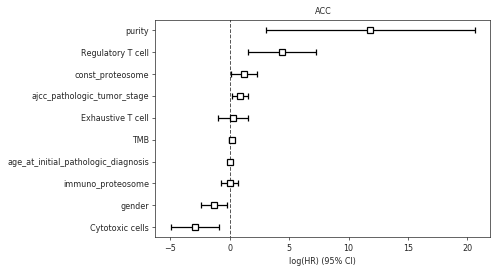

LIHC.tsv


<lifelines.CoxPHFitter: fitted with 327 total observations, 219 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 108
   partial log-likelihood = -519.27
         time fit was run = 2022-08-24 15:07:21 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                     0.08       1.09       0.13            -0.17             0.33                 0.85                 1.40
const_proteosome                      0.30       1.35       0.20            -0.10             0.70                 0.91                 2.01
Regulatory T cell                     0.64       1.90       0.43            -0.20             1.48                 0.82                 4.40
Exhaustive T cell                     0.33       1.39       0.26            -0.18             0.83                 0.84                 2.29
Cytotoxic cells                      -1.39       0.25       0.34            -2.05            -0.73                 0.13                 0.48
age_at_initial_pathologic_diagnosis   0.01       1.01       0.01            -0.01             0.02                 0.99                 1.03
gender                                0.29       1.34       0.21            -0.12             0.71                 0.88                 2.03
ajcc_pathologic_tumor_stage           0.44       1.55       0.11             0.22             0.66                 1.25                 1.93
TMB                                   0.07       1.07       0.04            -0.01             0.14                 0.99                 1.15
purity                                0.61       1.85       0.63            -0.63             1.86                 0.53                 6.41

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                    0.66   0.51       0.97
const_proteosome                     1.48   0.14       2.86
Regulatory T cell                    1.50   0.13       2.91
Exhaustive T cell                    1.27   0.20       2.30
Cytotoxic cells                     -4.10 <0.005      14.59
age_at_initial_pathologic_diagnosis  1.16   0.24       2.03
gender                               1.37   0.17       2.56
ajcc_pathologic_tumor_stage          3.96 <0.005      13.72
TMB                                  1.78   0.07       3.75
purity                               0.97   0.33       1.59
---
Concordance = 0.50
Partial AIC = 1058.54
log-likelihood ratio test = 50.27 on 10 df
-log2(p) of ll-ratio test = 22.01

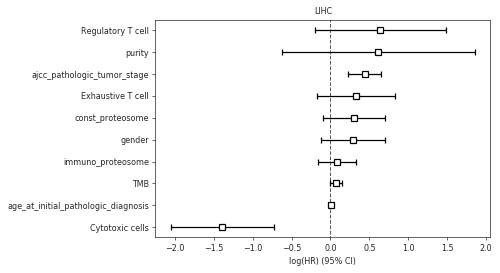

MESO.tsv


<lifelines.CoxPHFitter: fitted with 80 total observations, 12 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 80
number of events observed = 68
   partial log-likelihood = -229.77
         time fit was run = 2022-08-24 15:07:28 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -0.80       0.45       0.27            -1.33            -0.27                 0.26                 0.76
const_proteosome                      1.05       2.86       0.39             0.28             1.82                 1.32                 6.17
Regulatory T cell                     0.35       1.42       0.43            -0.48             1.19                 0.62                 3.27
Exhaustive T cell                     0.37       1.45       0.32            -0.26             1.00                 0.77                 2.71
Cytotoxic cells                      -0.59       0.55       0.49            -1.56             0.38                 0.21                 1.46
age_at_initial_pathologic_diagnosis   0.00       1.00       0.02            -0.03             0.04                 0.97                 1.04
gender                                0.50       1.65       0.34            -0.17             1.18                 0.84                 3.25
ajcc_pathologic_tumor_stage          -0.14       0.87       0.15            -0.44             0.15                 0.64                 1.17
TMB                                   0.08       1.08       0.18            -0.28             0.43                 0.75                 1.54
purity                               -2.06       0.13       0.77            -3.57            -0.55                 0.03                 0.57

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                   -2.98 <0.005       8.44
const_proteosome                     2.67   0.01       7.04
Regulatory T cell                    0.83   0.41       1.30
Exhaustive T cell                    1.16   0.25       2.01
Cytotoxic cells                     -1.20   0.23       2.12
age_at_initial_pathologic_diagnosis  0.12   0.90       0.15
gender                               1.46   0.14       2.80
ajcc_pathologic_tumor_stage         -0.95   0.34       1.55
TMB                                  0.42   0.68       0.56
purity                              -2.68   0.01       7.09
---
Concordance = 0.65
Partial AIC = 479.54
log-likelihood ratio test = 23.78 on 10 df
-log2(p) of ll-ratio test = 6.93

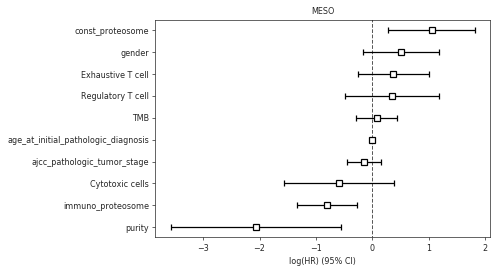

STAD.tsv


<lifelines.CoxPHFitter: fitted with 359 total observations, 224 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 359
number of events observed = 135
   partial log-likelihood = -676.85
         time fit was run = 2022-08-24 15:07:36 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -0.06       0.95       0.14            -0.33             0.22                 0.72                 1.24
const_proteosome                      0.10       1.11       0.21            -0.30             0.51                 0.74                 1.67
Regulatory T cell                     0.35       1.42       0.32            -0.28             0.98                 0.75                 2.66
Exhaustive T cell                    -0.34       0.71       0.29            -0.90             0.22                 0.41                 1.24
Cytotoxic cells                       0.33       1.39       0.41            -0.48             1.13                 0.62                 3.10
age_at_initial_pathologic_diagnosis   0.03       1.03       0.01             0.01             0.05                 1.01                 1.05
gender                                0.01       1.01       0.20            -0.38             0.39                 0.69                 1.47
ajcc_pathologic_tumor_stage           0.63       1.88       0.12             0.40             0.86                 1.49                 2.37
TMB                                  -0.03       0.97       0.01            -0.05            -0.00                 0.95                 1.00
purity                               -0.26       0.77       0.54            -1.32             0.79                 0.27                 2.21

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                   -0.40   0.69       0.54
const_proteosome                     0.50   0.62       0.70
Regulatory T cell                    1.08   0.28       1.83
Exhaustive T cell                   -1.20   0.23       2.11
Cytotoxic cells                      0.80   0.42       1.24
age_at_initial_pathologic_diagnosis  3.40 <0.005      10.55
gender                               0.03   0.98       0.03
ajcc_pathologic_tumor_stage          5.34 <0.005      23.38
TMB                                 -2.23   0.03       5.27
purity                              -0.48   0.63       0.67
---
Concordance = 0.68
Partial AIC = 1373.70
log-likelihood ratio test = 53.93 on 10 df
-log2(p) of ll-ratio test = 24.26

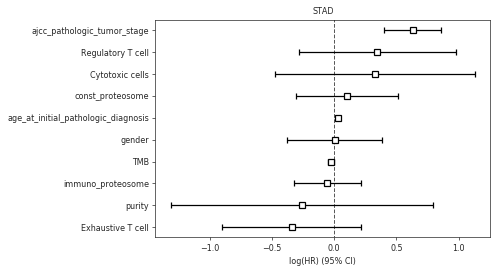

ESCA.tsv


<lifelines.CoxPHFitter: fitted with 141 total observations, 85 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 141
number of events observed = 56
   partial log-likelihood = -210.45
         time fit was run = 2022-08-24 15:07:43 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                     0.00       1.00       0.20            -0.39             0.39                 0.68                 1.48
const_proteosome                      0.05       1.05       0.31            -0.56             0.66                 0.57                 1.93
Regulatory T cell                     0.47       1.60       0.48            -0.46             1.41                 0.63                 4.08
Exhaustive T cell                    -0.02       0.98       0.53            -1.07             1.03                 0.34                 2.80
Cytotoxic cells                       0.88       2.41       0.71            -0.51             2.26                 0.60                 9.60
age_at_initial_pathologic_diagnosis   0.02       1.02       0.01            -0.01             0.04                 0.99                 1.04
gender                               -0.47       0.63       0.50            -1.44             0.50                 0.24                 1.65
ajcc_pathologic_tumor_stage           0.86       2.36       0.20             0.46             1.25                 1.59                 3.49
TMB                                  -0.00       1.00       0.03            -0.07             0.06                 0.93                 1.06
purity                                2.53      12.50       1.11             0.36             4.69                 1.43               109.07

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                    0.01   0.99       0.01
const_proteosome                     0.16   0.87       0.20
Regulatory T cell                    0.99   0.32       1.64
Exhaustive T cell                   -0.03   0.97       0.04
Cytotoxic cells                      1.24   0.21       2.23
age_at_initial_pathologic_diagnosis  1.10   0.27       1.89
gender                              -0.94   0.35       1.53
ajcc_pathologic_tumor_stage          4.27 <0.005      15.67
TMB                                 -0.11   0.91       0.13
purity                               2.28   0.02       5.49
---
Concordance = 0.68
Partial AIC = 440.90
log-likelihood ratio test = 28.62 on 10 df
-log2(p) of ll-ratio test = 9.44

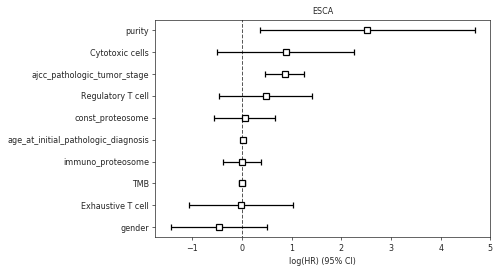

HNSC.tsv


<lifelines.CoxPHFitter: fitted with 421 total observations, 243 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 421
number of events observed = 178
   partial log-likelihood = -924.77
         time fit was run = 2022-08-24 15:07:52 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                     0.22       1.24       0.13            -0.03             0.46                 0.97                 1.59
const_proteosome                      0.00       1.00       0.18            -0.35             0.36                 0.70                 1.43
Regulatory T cell                     0.45       1.57       0.33            -0.20             1.09                 0.82                 2.99
Exhaustive T cell                    -0.45       0.64       0.29            -1.03             0.13                 0.36                 1.13
Cytotoxic cells                      -0.52       0.59       0.35            -1.22             0.17                 0.30                 1.18
age_at_initial_pathologic_diagnosis   0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
gender                                0.23       1.26       0.17            -0.11             0.57                 0.90                 1.77
ajcc_pathologic_tumor_stage           0.38       1.47       0.10             0.19             0.57                 1.21                 1.78
TMB                                   0.00       1.00       0.02            -0.04             0.05                 0.96                 1.05
purity                                0.67       1.96       0.52            -0.35             1.69                 0.70                 5.43

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                    1.73   0.08       3.59
const_proteosome                     0.02   0.99       0.02
Regulatory T cell                    1.37   0.17       2.54
Exhaustive T cell                   -1.53   0.13       2.99
Cytotoxic cells                     -1.48   0.14       2.86
age_at_initial_pathologic_diagnosis  3.46 <0.005      10.87
gender                               1.35   0.18       2.49
ajcc_pathologic_tumor_stage          3.96 <0.005      13.70
TMB                                  0.07   0.94       0.08
purity                               1.29   0.20       2.33
---
Concordance = 0.50
Partial AIC = 1869.55
log-likelihood ratio test = 42.56 on 10 df
-log2(p) of ll-ratio test = 17.36

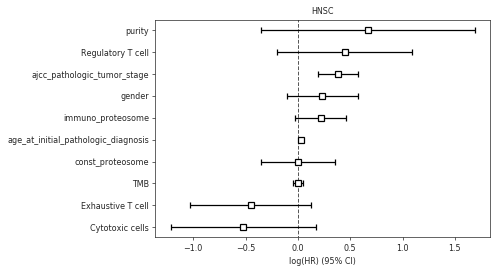

COAD.tsv


<lifelines.CoxPHFitter: fitted with 259 total observations, 199 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 259
number of events observed = 60
   partial log-likelihood = -262.73
         time fit was run = 2022-08-24 15:07:59 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -0.35       0.70       0.26            -0.86             0.16                 0.42                 1.17
const_proteosome                      0.35       1.42       0.46            -0.55             1.26                 0.58                 3.52
Regulatory T cell                     0.26       1.30       0.54            -0.80             1.33                 0.45                 3.76
Exhaustive T cell                     0.16       1.17       0.50            -0.82             1.14                 0.44                 3.13
Cytotoxic cells                       0.44       1.55       0.73            -0.98             1.86                 0.37                 6.43
age_at_initial_pathologic_diagnosis   0.04       1.04       0.01             0.01             0.06                 1.01                 1.06
gender                               -0.27       0.76       0.28            -0.83             0.28                 0.44                 1.33
ajcc_pathologic_tumor_stage           0.98       2.66       0.19             0.61             1.34                 1.85                 3.83
TMB                                   0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
purity                               -0.01       0.99       0.84            -1.65             1.64                 0.19                 5.13

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                   -1.35   0.18       2.50
const_proteosome                     0.77   0.44       1.18
Regulatory T cell                    0.48   0.63       0.67
Exhaustive T cell                    0.32   0.75       0.42
Cytotoxic cells                      0.60   0.55       0.88
age_at_initial_pathologic_diagnosis  3.03 <0.005       8.68
gender                              -0.96   0.34       1.56
ajcc_pathologic_tumor_stage          5.25 <0.005      22.63
TMB                                  0.41   0.68       0.56
purity                              -0.01   0.99       0.01
---
Concordance = 0.50
Partial AIC = 545.45
log-likelihood ratio test = 39.15 on 10 df
-log2(p) of ll-ratio test = 15.35

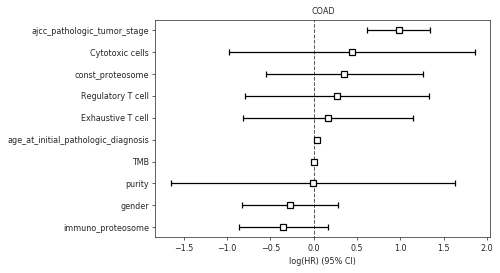

PAAD.tsv


<lifelines.CoxPHFitter: fitted with 141 total observations, 59 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 141
number of events observed = 82
   partial log-likelihood = -330.39
         time fit was run = 2022-08-24 15:08:07 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                     0.28       1.32       0.29            -0.29             0.85                 0.75                 2.34
const_proteosome                      0.09       1.10       0.36            -0.61             0.80                 0.54                 2.22
Regulatory T cell                     0.17       1.18       0.44            -0.71             1.04                 0.49                 2.82
Exhaustive T cell                    -0.22       0.80       0.36            -0.92             0.47                 0.40                 1.61
Cytotoxic cells                       0.30       1.35       0.46            -0.60             1.20                 0.55                 3.31
age_at_initial_pathologic_diagnosis   0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
gender                                0.20       1.23       0.25            -0.29             0.70                 0.75                 2.00
ajcc_pathologic_tumor_stage          -0.12       0.89       0.25            -0.61             0.37                 0.55                 1.45
TMB                                   0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
purity                               -1.00       0.37       0.54            -2.06             0.06                 0.13                 1.06

                                        z    p   -log2(p)
covariate                                                
immuno_proteosome                    0.97 0.33       1.58
const_proteosome                     0.26 0.80       0.33
Regulatory T cell                    0.37 0.71       0.49
Exhaustive T cell                   -0.62 0.53       0.91
Cytotoxic cells                      0.65 0.51       0.96
age_at_initial_pathologic_diagnosis  1.06 0.29       1.79
gender                               0.81 0.42       1.26
ajcc_pathologic_tumor_stage         -0.47 0.63       0.66
TMB                                  0.08 0.94       0.09
purity                              -1.85 0.06       3.97
---
Concordance = 0.50
Partial AIC = 680.78
log-likelihood ratio test = 10.27 on 10 df
-log2(p) of ll-ratio test = 1.26

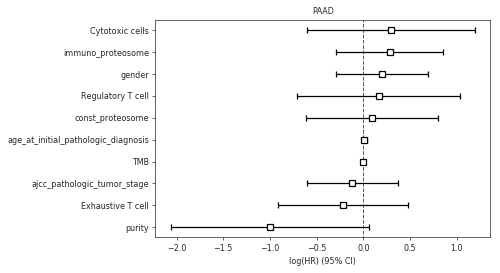

UVM.tsv


<lifelines.CoxPHFitter: fitted with 79 total observations, 57 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 79
number of events observed = 22
   partial log-likelihood = -62.71
         time fit was run = 2022-08-24 15:08:14 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -0.00       1.00       0.37            -0.73             0.72                 0.48                 2.05
const_proteosome                      0.92       2.51       1.13            -1.29             3.13                 0.27                22.87
Regulatory T cell                    -1.24       0.29       1.02            -3.25             0.77                 0.04                 2.16
Exhaustive T cell                     2.30      10.00       0.88             0.58             4.02                 1.79                55.80
Cytotoxic cells                       0.53       1.70       0.97            -1.37             2.43                 0.26                11.31
age_at_initial_pathologic_diagnosis   0.06       1.06       0.02             0.01             0.11                 1.01                 1.11
gender                               -0.04       0.96       0.51            -1.04             0.96                 0.35                 2.60
ajcc_pathologic_tumor_stage           1.56       4.75       0.54             0.51             2.61                 1.66                13.63
TMB                                  -0.24       0.79       0.92            -2.03             1.56                 0.13                 4.74
purity                                4.36      78.17       2.61            -0.76             9.47                 0.47             13018.47

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                   -0.01   0.99       0.01
const_proteosome                     0.81   0.42       1.27
Regulatory T cell                   -1.21   0.23       2.14
Exhaustive T cell                    2.63   0.01       6.85
Cytotoxic cells                      0.55   0.58       0.78
age_at_initial_pathologic_diagnosis  2.41   0.02       5.97
gender                              -0.08   0.93       0.10
ajcc_pathologic_tumor_stage          2.90 <0.005       8.08
TMB                                 -0.26   0.79       0.33
purity                               1.67   0.09       3.40
---
Concordance = 0.84
Partial AIC = 145.43
log-likelihood ratio test = 33.92 on 10 df
-log2(p) of ll-ratio test = 12.36

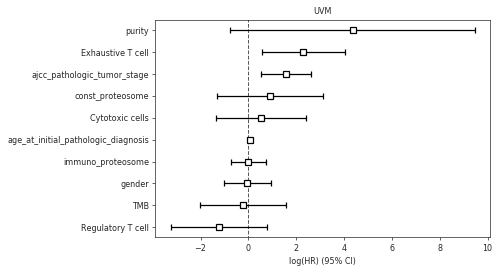

SARC.tsv
LUSC.tsv


<lifelines.CoxPHFitter: fitted with 447 total observations, 253 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 447
number of events observed = 194
   partial log-likelihood = -995.82
         time fit was run = 2022-08-24 15:08:29 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                     0.14       1.15       0.12            -0.10             0.37                 0.91                 1.45
const_proteosome                     -0.07       0.94       0.18            -0.42             0.29                 0.65                 1.34
Regulatory T cell                     0.73       2.08       0.29             0.16             1.30                 1.18                 3.67
Exhaustive T cell                    -0.21       0.81       0.28            -0.76             0.35                 0.47                 1.42
Cytotoxic cells                      -0.09       0.92       0.38            -0.84             0.67                 0.43                 1.95
age_at_initial_pathologic_diagnosis   0.02       1.02       0.01            -0.00             0.03                 1.00                 1.04
gender                               -0.22       0.80       0.17            -0.55             0.12                 0.57                 1.13
ajcc_pathologic_tumor_stage           0.26       1.29       0.09             0.09             0.43                 1.09                 1.53
TMB                                  -0.01       0.99       0.02            -0.04             0.03                 0.96                 1.03
purity                                0.45       1.57       0.49            -0.51             1.41                 0.60                 4.09

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                    1.13   0.26       1.96
const_proteosome                    -0.37   0.71       0.48
Regulatory T cell                    2.51   0.01       6.39
Exhaustive T cell                   -0.73   0.47       1.10
Cytotoxic cells                     -0.22   0.82       0.28
age_at_initial_pathologic_diagnosis  1.91   0.06       4.15
gender                              -1.27   0.20       2.29
ajcc_pathologic_tumor_stage          2.96 <0.005       8.33
TMB                                 -0.39   0.69       0.53
purity                               0.92   0.36       1.49
---
Concordance = 0.62
Partial AIC = 2011.65
log-likelihood ratio test = 24.76 on 10 df
-log2(p) of ll-ratio test = 7.42

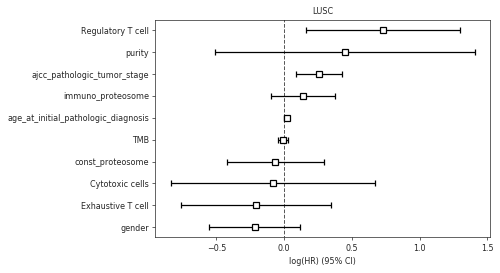

BLCA.tsv


<lifelines.CoxPHFitter: fitted with 390 total observations, 218 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 390
number of events observed = 172
   partial log-likelihood = -868.58
         time fit was run = 2022-08-24 15:08:37 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -0.25       0.78       0.11            -0.47            -0.03                 0.63                 0.97
const_proteosome                      0.36       1.43       0.20            -0.02             0.75                 0.98                 2.11
Regulatory T cell                     0.90       2.46       0.33             0.25             1.55                 1.28                 4.72
Exhaustive T cell                    -0.08       0.93       0.31            -0.68             0.53                 0.50                 1.71
Cytotoxic cells                      -0.03       0.97       0.37            -0.75             0.69                 0.47                 1.99
age_at_initial_pathologic_diagnosis   0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
gender                                0.09       1.10       0.17            -0.25             0.43                 0.78                 1.54
ajcc_pathologic_tumor_stage           0.40       1.50       0.10             0.20             0.60                 1.23                 1.83
TMB                                  -0.09       0.91       0.03            -0.15            -0.04                 0.86                 0.96
purity                                0.17       1.19       0.47            -0.75             1.10                 0.47                 3.01

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                   -2.20   0.03       5.15
const_proteosome                     1.84   0.07       3.93
Regulatory T cell                    2.71   0.01       7.24
Exhaustive T cell                   -0.24   0.81       0.31
Cytotoxic cells                     -0.09   0.93       0.10
age_at_initial_pathologic_diagnosis  2.63   0.01       6.88
gender                               0.54   0.59       0.76
ajcc_pathologic_tumor_stage          3.95 <0.005      13.65
TMB                                 -3.52 <0.005      11.19
purity                               0.37   0.71       0.49
---
Concordance = 0.71
Partial AIC = 1757.16
log-likelihood ratio test = 85.18 on 10 df
-log2(p) of ll-ratio test = 44.24

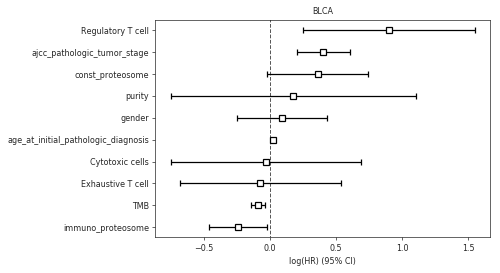

LGG.tsv
CHOL.tsv


<lifelines.CoxPHFitter: fitted with 36 total observations, 18 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 36
number of events observed = 18
   partial log-likelihood = -46.82
         time fit was run = 2022-08-24 15:08:52 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -0.08       0.92       0.40            -0.87             0.70                 0.42                 2.02
const_proteosome                      1.19       3.29       0.75            -0.29             2.67                 0.75                14.40
Regulatory T cell                    -0.65       0.52       1.09            -2.79             1.48                 0.06                 4.41
Exhaustive T cell                     0.83       2.30       0.95            -1.03             2.70                 0.36                14.89
Cytotoxic cells                      -2.16       0.12       1.00            -4.13            -0.19                 0.02                 0.83
age_at_initial_pathologic_diagnosis  -0.01       0.99       0.03            -0.06             0.04                 0.94                 1.04
gender                                0.34       1.41       0.70            -1.04             1.72                 0.35                 5.60
ajcc_pathologic_tumor_stage           0.29       1.34       0.23            -0.15             0.74                 0.86                 2.09
TMB                                   0.31       1.36       0.14             0.03             0.58                 1.04                 1.79
purity                               -2.92       0.05       2.27            -7.38             1.54                 0.00                 4.66

                                        z    p   -log2(p)
covariate                                                
immuno_proteosome                   -0.21 0.84       0.26
const_proteosome                     1.58 0.11       3.13
Regulatory T cell                   -0.60 0.55       0.86
Exhaustive T cell                    0.88 0.38       1.39
Cytotoxic cells                     -2.15 0.03       4.99
age_at_initial_pathologic_diagnosis -0.39 0.70       0.52
gender                               0.49 0.63       0.68
ajcc_pathologic_tumor_stage          1.29 0.20       2.33
TMB                                  2.21 0.03       5.19
purity                              -1.28 0.20       2.33
---
Concordance = 0.72
Partial AIC = 113.64
log-likelihood ratio test = 11.42 on 10 df
-log2(p) of ll-ratio test = 1.62

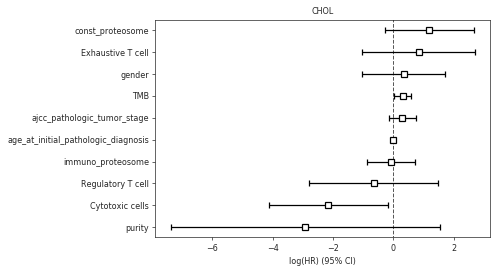

LAML.tsv
GBM.tsv
SKCM.tsv


<lifelines.CoxPHFitter: fitted with 377 total observations, 209 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 377
number of events observed = 168
   partial log-likelihood = -799.86
         time fit was run = 2022-08-24 15:09:14 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -0.02       0.98       0.11            -0.24             0.20                 0.78                 1.22
const_proteosome                      0.59       1.81       0.18             0.24             0.94                 1.28                 2.56
Regulatory T cell                     0.48       1.62       0.36            -0.23             1.19                 0.80                 3.30
Exhaustive T cell                    -1.29       0.27       0.32            -1.93            -0.66                 0.15                 0.52
Cytotoxic cells                       0.63       1.88       0.36            -0.08             1.34                 0.92                 3.82
age_at_initial_pathologic_diagnosis   0.02       1.02       0.01             0.01             0.03                 1.01                 1.03
gender                               -0.19       0.82       0.18            -0.54             0.15                 0.58                 1.17
ajcc_pathologic_tumor_stage           0.46       1.58       0.10             0.26             0.66                 1.29                 1.93
TMB                                  -0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
purity                                0.55       1.73       0.46            -0.35             1.44                 0.71                 4.24

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                   -0.19   0.85       0.24
const_proteosome                     3.34 <0.005      10.20
Regulatory T cell                    1.33   0.18       2.45
Exhaustive T cell                   -4.02 <0.005      14.07
Cytotoxic cells                      1.74   0.08       3.62
age_at_initial_pathologic_diagnosis  3.54 <0.005      11.26
gender                              -1.09   0.27       1.87
ajcc_pathologic_tumor_stage          4.48 <0.005      17.02
TMB                                 -0.45   0.65       0.62
purity                               1.20   0.23       2.12
---
Concordance = 0.50
Partial AIC = 1619.73
log-likelihood ratio test = 81.85 on 10 df
-log2(p) of ll-ratio test = 42.06

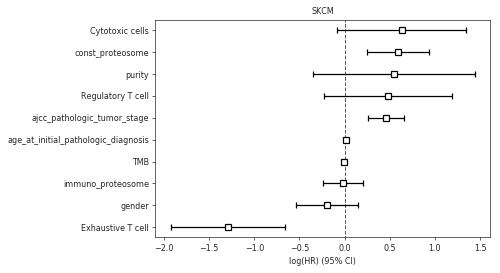

KIRP.tsv


<lifelines.CoxPHFitter: fitted with 244 total observations, 210 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 244
number of events observed = 34
   partial log-likelihood = -136.36
         time fit was run = 2022-08-24 15:09:21 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -0.64       0.53       0.41            -1.45             0.17                 0.23                 1.19
const_proteosome                     -0.66       0.52       0.63            -1.90             0.58                 0.15                 1.78
Regulatory T cell                     0.32       1.37       0.77            -1.20             1.83                 0.30                 6.24
Exhaustive T cell                     1.17       3.22       0.50             0.20             2.14                 1.22                 8.52
Cytotoxic cells                       0.51       1.66       0.77            -1.00             2.01                 0.37                 7.48
age_at_initial_pathologic_diagnosis   0.01       1.01       0.01            -0.01             0.04                 0.99                 1.04
gender                                0.17       1.19       0.42            -0.66             1.00                 0.52                 2.72
ajcc_pathologic_tumor_stage           1.12       3.08       0.19             0.76             1.49                 2.14                 4.43
TMB                                  -0.17       0.84       0.14            -0.45             0.11                 0.64                 1.12
purity                                1.42       4.15       1.49            -1.49             4.34                 0.23                76.46

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                   -1.54   0.12       3.02
const_proteosome                    -1.05   0.29       1.76
Regulatory T cell                    0.41   0.68       0.55
Exhaustive T cell                    2.36   0.02       5.78
Cytotoxic cells                      0.66   0.51       0.97
age_at_initial_pathologic_diagnosis  1.02   0.31       1.69
gender                               0.40   0.69       0.54
ajcc_pathologic_tumor_stage          6.04 <0.005      29.30
TMB                                 -1.18   0.24       2.08
purity                               0.96   0.34       1.56
---
Concordance = 0.50
Partial AIC = 292.73
log-likelihood ratio test = 51.42 on 10 df
-log2(p) of ll-ratio test = 22.71

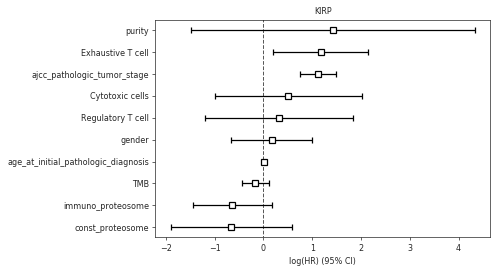

BRCA.tsv


<lifelines.CoxPHFitter: fitted with 961 total observations, 836 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 961
number of events observed = 125
   partial log-likelihood = -658.58
         time fit was run = 2022-08-24 15:09:32 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -0.26       0.77       0.15            -0.54             0.03                 0.58                 1.03
const_proteosome                      0.17       1.18       0.23            -0.29             0.62                 0.75                 1.86
Regulatory T cell                     1.20       3.32       0.37             0.47             1.92                 1.61                 6.85
Exhaustive T cell                    -0.14       0.87       0.30            -0.73             0.45                 0.48                 1.57
Cytotoxic cells                      -0.08       0.92       0.40            -0.86             0.70                 0.42                 2.01
age_at_initial_pathologic_diagnosis   0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
gender                                0.13       1.13       1.01            -1.85             2.10                 0.16                 8.17
ajcc_pathologic_tumor_stage           0.74       2.10       0.12             0.51             0.97                 1.67                 2.64
TMB                                   0.04       1.04       0.01             0.01             0.06                 1.01                 1.06
purity                               -0.14       0.87       0.64            -1.39             1.11                 0.25                 3.02

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                   -1.78   0.08       3.72
const_proteosome                     0.71   0.48       1.07
Regulatory T cell                    3.24 <0.005       9.70
Exhaustive T cell                   -0.46   0.65       0.63
Cytotoxic cells                     -0.20   0.84       0.25
age_at_initial_pathologic_diagnosis  4.59 <0.005      17.78
gender                               0.13   0.90       0.15
ajcc_pathologic_tumor_stage          6.32 <0.005      31.79
TMB                                  2.74   0.01       7.34
purity                              -0.22   0.82       0.28
---
Concordance = 0.50
Partial AIC = 1337.17
log-likelihood ratio test = 77.28 on 10 df
-log2(p) of ll-ratio test = 39.09

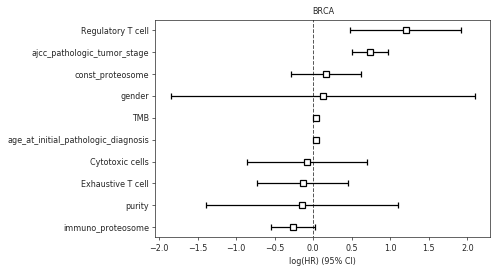

KIRC.tsv


<lifelines.CoxPHFitter: fitted with 342 total observations, 251 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 342
number of events observed = 91
   partial log-likelihood = -423.33
         time fit was run = 2022-08-24 15:09:41 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                     0.11       1.12       0.24            -0.36             0.59                 0.69                 1.81
const_proteosome                      0.50       1.64       0.32            -0.13             1.13                 0.87                 3.08
Regulatory T cell                    -0.35       0.70       0.46            -1.25             0.54                 0.29                 1.72
Exhaustive T cell                    -0.19       0.83       0.30            -0.77             0.39                 0.47                 1.48
Cytotoxic cells                      -0.50       0.60       0.42            -1.32             0.31                 0.27                 1.37
age_at_initial_pathologic_diagnosis   0.05       1.05       0.01             0.03             0.07                 1.03                 1.07
gender                                0.02       1.02       0.23            -0.44             0.48                 0.65                 1.61
ajcc_pathologic_tumor_stage           0.70       2.01       0.11             0.49             0.91                 1.64                 2.48
TMB                                   0.22       1.25       0.08             0.08             0.37                 1.08                 1.45
purity                               -1.10       0.33       0.88            -2.82             0.62                 0.06                 1.85

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                    0.47   0.64       0.65
const_proteosome                     1.54   0.12       3.03
Regulatory T cell                   -0.77   0.44       1.19
Exhaustive T cell                   -0.63   0.53       0.93
Cytotoxic cells                     -1.21   0.23       2.13
age_at_initial_pathologic_diagnosis  4.46 <0.005      16.90
gender                               0.09   0.93       0.11
ajcc_pathologic_tumor_stage          6.65 <0.005      35.03
TMB                                  2.97 <0.005       8.41
purity                              -1.26   0.21       2.26
---
Concordance = 0.50
Partial AIC = 866.66
log-likelihood ratio test = 91.50 on 10 df
-log2(p) of ll-ratio test = 48.40

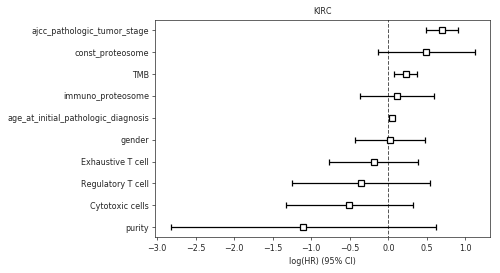

LUAD.tsv


<lifelines.CoxPHFitter: fitted with 474 total observations, 309 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 474
number of events observed = 165
   partial log-likelihood = -843.86
         time fit was run = 2022-08-24 15:09:50 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                     0.15       1.16       0.12            -0.10             0.39                 0.91                 1.48
const_proteosome                      0.52       1.69       0.19             0.15             0.89                 1.17                 2.44
Regulatory T cell                     0.02       1.02       0.34            -0.64             0.68                 0.53                 1.97
Exhaustive T cell                    -0.06       0.94       0.27            -0.59             0.47                 0.55                 1.61
Cytotoxic cells                      -0.54       0.58       0.33            -1.19             0.11                 0.31                 1.11
age_at_initial_pathologic_diagnosis   0.02       1.02       0.01             0.00             0.03                 1.00                 1.03
gender                                0.14       1.15       0.17            -0.18             0.47                 0.83                 1.59
ajcc_pathologic_tumor_stage           0.53       1.69       0.08             0.38             0.68                 1.46                 1.97
TMB                                   0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
purity                                0.68       1.98       0.55            -0.40             1.77                 0.67                 5.88

                                        z      p   -log2(p)
covariate                                                  
immuno_proteosome                    1.18   0.24       2.08
const_proteosome                     2.78   0.01       7.51
Regulatory T cell                    0.05   0.96       0.06
Exhaustive T cell                   -0.22   0.83       0.27
Cytotoxic cells                     -1.63   0.10       3.28
age_at_initial_pathologic_diagnosis  1.98   0.05       4.39
gender                               0.85   0.40       1.33
ajcc_pathologic_tumor_stage          6.92 <0.005      37.67
TMB                                  0.17   0.87       0.20
purity                               1.23   0.22       2.20
---
Concordance = 0.50
Partial AIC = 1707.72
log-likelihood ratio test = 64.22 on 10 df
-log2(p) of ll-ratio test = 30.71

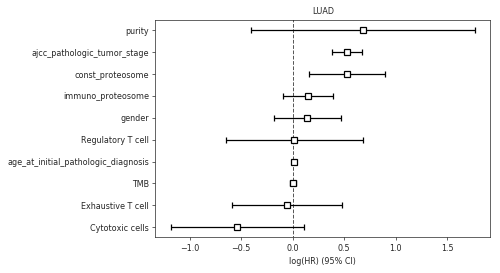

READ.tsv


<lifelines.CoxPHFitter: fitted with 80 total observations, 66 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 80
number of events observed = 14
   partial log-likelihood = -35.65
         time fit was run = 2022-08-24 15:09:57 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
immuno_proteosome                    -1.18       0.31       0.76            -2.66             0.31                 0.07                 1.37
const_proteosome                      2.44      11.51       1.13             0.22             4.67                 1.25               106.29
Regulatory T cell                     3.45      31.49       1.66             0.20             6.70                 1.22               810.27
Exhaustive T cell                     1.01       2.74       1.33            -1.59             3.61                 0.20                37.09
Cytotoxic cells                      -0.18       0.83       1.85            -3.80             3.44                 0.02                31.05
age_at_initial_pathologic_diagnosis   0.10       1.11       0.04             0.02             0.18                 1.02                 1.20
gender                               -0.10       0.91       0.85            -1.77             1.58                 0.17                 4.84
ajcc_pathologic_tumor_stage           0.39       1.48       0.41            -0.41             1.19                 0.66                 3.30
TMB                                  -0.07       0.94       0.17            -0.40             0.27                 0.67                 1.31
purity                                5.53     251.66       3.15            -0.65            11.70                 0.52             1.21e+05

                                        z    p   -log2(p)
covariate                                                
immuno_proteosome                   -1.55 0.12       3.04
const_proteosome                     2.15 0.03       5.00
Regulatory T cell                    2.08 0.04       4.74
Exhaustive T cell                    0.76 0.45       1.16
Cytotoxic cells                     -0.10 0.92       0.12
age_at_initial_pathologic_diagnosis  2.56 0.01       6.56
gender                              -0.11 0.91       0.14
ajcc_pathologic_tumor_stage          0.95 0.34       1.56
TMB                                 -0.38 0.70       0.51
purity                               1.75 0.08       3.66
---
Concordance = 0.85
Partial AIC = 91.29
log-likelihood ratio test = 25.13 on 10 df
-log2(p) of ll-ratio test = 7.62

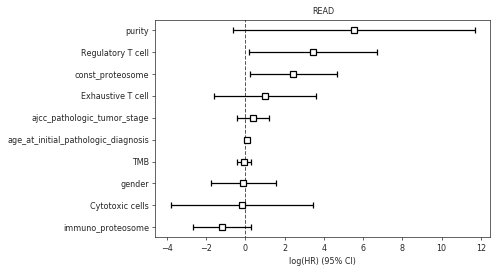

In [165]:
######## tumor purity information####################################################################
tumor_purity_df=pd.read_csv("/workspace/projects/immunoproteasome/data/purity_data/TCGA_mastercalls.abs_tables_JSedit.fixed.txt",sep='\t')
tumor_purity_df['sample_id']=tumor_purity_df['array'].str.split('-').str[0:3].str.join('.')
tumor_purity_df=tumor_purity_df[['purity','sample_id']]
tumor_purity_df=tumor_purity_df.set_index('sample_id')
#### Mutational file ##############################################################################
tumor_mutation_df = pd.read_csv('/workspace/projects/immunoproteasome/data/tcga_cohort.txt', sep="\t",header = 0)
tumor_mutation_df['TMB']=tumor_mutation_df['total']/50
tumor_mutation_df['Tumor_Sample_Barcode']=tumor_mutation_df['Tumor_Sample_Barcode'].str.split('-').str[0:3].str.join('.')
tumor_mutation_df=tumor_mutation_df.set_index('Tumor_Sample_Barcode')
######### stage age gender included into the list of variables####################################
xls_1 = pd.ExcelFile('/workspace/shared/dataset/tcga_exome/tcga_cdr/mmc1.xlsx')
df_1 = xls_1.parse(0)
df_age_sex_grade_info=df_1[['bcr_patient_barcode','type','age_at_initial_pathologic_diagnosis','gender','ajcc_pathologic_tumor_stage','OS','OS.time']]
df_age_sex_grade_info['bcr_patient_barcode']=df_age_sex_grade_info['bcr_patient_barcode'].str.split('-').str[0:3].str.join('.')
df_age_sex_grade_info=df_age_sex_grade_info.set_index('bcr_patient_barcode')
df_age_sex_grade_info['gender']=df_age_sex_grade_info['gender'].replace(['MALE','FEMALE'],[1,2])
df_age_sex_grade_info['ajcc_pathologic_tumor_stage'] = df_age_sex_grade_info['ajcc_pathologic_tumor_stage'].replace(['Stage IA','Stage IB','Stage IIA','Stage IIB','Stage IIC','Stage IIIA','Stage IIIB','Stage IIIC','Stage IVA','Stage IVB','Stage IVC'],['Stage I','Stage I','Stage II','Stage II','Stage II','Stage III','Stage III','Stage III','Stage IV','Stage IV','Stage IV'])
df_age_sex_grade_info['ajcc_pathologic_tumor_stage'] = df_age_sex_grade_info['ajcc_pathologic_tumor_stage'].replace(['Stage I','Stage II','Stage III','Stage IV'],[1,2,3,4])
##################################################################################################
xls = pd.ExcelFile('/workspace/shared/dataset/tcga_exome/tcga_cdr/mmc1.xlsx')
df = xls.parse(0)
###================================================================================================

input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"
#input_path2="/workspace/projects/immunoproteasome/R_code/v1.1/03_output/"
#input_path2="/workspace/projects/immunoproteasome/03_output_v1/"
input_path3="/workspace/projects/immunoproteasome/v1_copy_4/03_output/"
cytotoxic_hazard_summary=[]
tumor_tissue1=[]

tumor_tissue.remove('UCS.tsv')
tumor_tissue.remove('OV.tsv')
tumor_tissue.remove('CESC.tsv')
tumor_tissue.remove('PRAD.tsv')
tumor_tissue.remove('UCEC.tsv')

for i in range(len(tumor_tissue)):
    print(tumor_tissue[i])
    gene_data_frame=pd.read_csv(input_path1+tumor_tissue[i],sep='\t',index_col=0)
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=gene_data_frame.T+1
    
    log_gene_data_frame=np.log2(gene_data_frame)
    log_gene_data_frame['const_proteosome']=(1/3)*(log_gene_data_frame['PSMB5']+log_gene_data_frame['PSMB6']+log_gene_data_frame['PSMB7'])
    log_gene_data_frame['immuno_proteosome']=(1/3)*(log_gene_data_frame['PSMB8']+log_gene_data_frame['PSMB9']+log_gene_data_frame['PSMB10'])
    #log_gene_data_frame['Exhausted_T_cell_score']=(1/3)*(log_gene_data_frame['LAG3']+log_gene_data_frame['HAVCR2']+log_gene_data_frame['PDCD1'])
    
    #df1=df[['bcr_patient_barcode','type','OS','OS.time','DSS','DSS.time','DFI','DFI.time','PFI','PFI.time']]
    #df1['bcr_patient_barcode']=df1['bcr_patient_barcode'].str.split('-').str[0:3].str.join('.')
    #df1=df1.set_index('bcr_patient_barcode')

    #df2=df1[['OS','OS.time']]
    #df3=pd.merge(log_gene_data_frame[['const_proteosome','immuno_proteosome','Exhausted_T_cell_score']],df2,left_index=True, right_index=True)
    #df3=df3.dropna()
    
    immune_gsva_score=pd.read_csv(input_path3+'GSVA_'+'immune_cells_'+tumor_tissue[i],sep='\t')
    
    df3=pd.merge(log_gene_data_frame[['const_proteosome','immuno_proteosome']],immune_gsva_score.T,left_index=True, right_index=True)
    df_immunogenicity_proteasome_immune_cells_score1=pd.merge(df3,tumor_purity_df,left_index=True, right_index=True)
    df_immunogenicity_proteasome_immune_cells_score2=pd.merge(df_age_sex_grade_info,df_immunogenicity_proteasome_immune_cells_score1,left_index=True, right_index=True)
    df_immunogenicity_proteasome_immune_cells_score3=pd.merge(tumor_mutation_df,df_immunogenicity_proteasome_immune_cells_score2,left_index=True, right_index=True)
    
    
    #df_immunogenicity_proteasome_immune_cells_score=pd.merge(immune_gsva_score.T,df3,left_index=True, right_index=True)  ## for just immune cells use this
    #df_immunogenicity_proteasome_immune_cells_score1=pd.merge(df_immunogenicity_proteasome_immune_cells_score,tumor_purity_df,left_index=True, right_index=True) #for purity use this
    #df_immunogenicity_proteasome_immune_cells_score2=pd.merge(df_age_sex_grade_info,df_immunogenicity_proteasome_immune_cells_score,left_index=True, right_index=True) # for age sex grade use this
    #df_immunogenicity_proteasome_immune_cells_score3=pd.merge(tumor_mutation_df,df_immunogenicity_proteasome_immune_cells_score,left_index=True, right_index=True)  # for tumor mutation burden use this
    
    variables=['immuno_proteosome','const_proteosome','Regulatory T cell','Exhaustive T cell','Cytotoxic cells','age_at_initial_pathologic_diagnosis','gender','ajcc_pathologic_tumor_stage','TMB','purity','OS', 'OS.time']
    
    #df_subset=df_immunogenicity_proteasome_immune_cells_score3[['immuno_proteosome','ajcc_pathologic_tumor_stage','OS','OS.time']] ### Put different varaible along with Immunoproteasome score
    df_subset=df_immunogenicity_proteasome_immune_cells_score3[variables] ### Put different varaible along with Immunoproteasome score
    
    df_subset=df_subset.dropna()
    df_subset=df_subset.drop(df_subset[df_subset.ajcc_pathologic_tumor_stage=='[Not Available]'].index)
    df_subset=df_subset.drop(df_subset[df_subset.ajcc_pathologic_tumor_stage=='[Discrepancy]'].index)
    df_subset=df_subset.drop(df_subset[df_subset.ajcc_pathologic_tumor_stage=='[Unknown]'].index)
    df_subset=df_subset.drop(df_subset[df_subset.ajcc_pathologic_tumor_stage=='I/II NOS'].index)
    df_subset=df_subset.drop(df_subset[df_subset.ajcc_pathologic_tumor_stage=='Stage X'].index)
    
    try:
        cph = CoxPHFitter()
        cph.fit(df_subset, duration_col='OS.time', event_col='OS')
        cph.print_summary()
        cytotoxic_hazard_summary.append(list(cph.summary.iloc[0]))
        tumor_tissue1.append(tumor_tissue[i].split('.')[0])
        cph.plot()
        plt.title(tumor_tissue[i].split('.')[0])
        plt.show()
    except ZeroDivisionError:
        pass
    
    #plt.plot(df_immunogenicity_proteasome_immune_cells_score3['Exhaustive T cell'],df_immunogenicity_proteasome_immune_cells_score3['Exhausted_T_cell_score'],'o')
    #plt.show()


#df_tmp_immuno=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno.index=tumor_tissue1
#df_tmp_immuno['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno['p'])), method = 'BH')
#df_tmp_immuno['error_bar']=np.abs(((df_tmp_immuno['coef upper 95%'])-(df_tmp_immuno['coef lower 95%']))/2)

#df_tmp_immuno_cytox=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_cytox.index=tumor_tissue1
#df_tmp_immuno_cytox['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_cytox['p'])), method = 'BH')
#df_tmp_immuno_cytox['error_bar']=np.abs(((df_tmp_immuno_cytox['coef upper 95%'])-(df_tmp_immuno_cytox['coef lower 95%']))/2)

#df_tmp_immuno_reg=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_reg.index=tumor_tissue1
#df_tmp_immuno_reg['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_reg['p'])), method = 'BH')
#df_tmp_immuno_reg['error_bar']=np.abs(((df_tmp_immuno_reg['coef upper 95%'])-(df_tmp_immuno_reg['coef lower 95%']))/2)

#df_tmp_immuno_Exhausted_T_cell_score=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_Exhausted_T_cell_score.index=tumor_tissue1
#df_tmp_immuno_Exhausted_T_cell_score['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_Exhausted_T_cell_score['p'])), method = 'BH')
#df_tmp_immuno_Exhausted_T_cell_score['error_bar']=np.abs(((df_tmp_immuno_Exhausted_T_cell_score['coef upper 95%'])-(df_tmp_immuno_Exhausted_T_cell_score['coef lower 95%']))/2)

#df_tmp_immuno_TMB=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_TMB.index=tumor_tissue1
#df_tmp_immuno_TMB['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_TMB['p'])), method = 'BH')
#df_tmp_immuno_TMB['error_bar']=np.abs(((df_tmp_immuno_TMB['coef upper 95%'])-(df_tmp_immuno_TMB['coef lower 95%']))/2)

#df_tmp_immuno_purity=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_purity.index=tumor_tissue1
#df_tmp_immuno_purity['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_purity['p'])), method = 'BH')
#df_tmp_immuno_purity['error_bar']=np.abs(((df_tmp_immuno_purity['coef upper 95%'])-(df_tmp_immuno_purity['coef lower 95%']))/2)

#df_tmp_immuno_const=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_const.index=tumor_tissue1
#df_tmp_immuno_const['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_const['p'])), method = 'BH')
#df_tmp_immuno_const['error_bar']=np.abs(((df_tmp_immuno_const['coef upper 95%'])-(df_tmp_immuno_const['coef lower 95%']))/2)

#df_tmp_immuno_age=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_age.index=tumor_tissue1
#df_tmp_immuno_age['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_age['p'])), method = 'BH')
#df_tmp_immuno_age['error_bar']=np.abs(((df_tmp_immuno_age['coef upper 95%'])-(df_tmp_immuno_age['coef lower 95%']))/2)

#df_tmp_immuno_gender=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_gender.index=tumor_tissue1
#df_tmp_immuno_gender['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_gender['p'])), method = 'BH')
#df_tmp_immuno_gender['error_bar']=np.abs(((df_tmp_immuno_gender['coef upper 95%'])-(df_tmp_immuno_gender['coef lower 95%']))/2)

#df_tmp_immuno_stage=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_stage.index=tumor_tissue1
#df_tmp_immuno_stage['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_stage['p'])), method = 'BH')
#df_tmp_immuno_stage['error_bar']=np.abs(((df_tmp_immuno_stage['coef upper 95%'])-(df_tmp_immuno_stage['coef lower 95%']))/2)

df_tmp_immuno_all=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
df_tmp_immuno_all.index=tumor_tissue1
df_tmp_immuno_all['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_all['p'])), method = 'BH')
df_tmp_immuno_all['error_bar']=np.abs(((df_tmp_immuno_all['coef upper 95%'])-(df_tmp_immuno_all['coef lower 95%']))/2)

#plt.plot(df_immunogenicity_proteasome_immune_cells_score3['Exhaustive T cell'],df_immunogenicity_proteasome_immune_cells_score3['Exhausted_T_cell_score'],'o')
#plt.show()


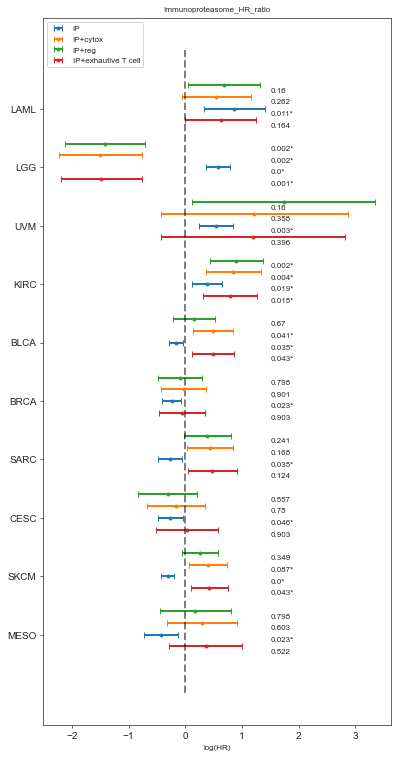

In [17]:
tt_list=['MESO','SKCM','CESC','SARC','BRCA','BLCA','KIRC','UVM','LGG','LAML']

df_tmp_immuno=df_tmp_immuno.sort_values(by=['coef'])
df_tmp_immuno=df_tmp_immuno.loc[tt_list]
df_tmp_immuno['y_value']=np.array(range(1,11))

df_tmp_immuno_cytox=df_tmp_immuno_cytox.reindex(df_tmp_immuno.index)
df_tmp_immuno_cytox=df_tmp_immuno_cytox.loc[tt_list]
df_tmp_immuno_cytox['y_value']=np.array(range(1,11))

df_tmp_immuno_reg=df_tmp_immuno_reg.reindex(df_tmp_immuno.index)
df_tmp_immuno_reg=df_tmp_immuno_reg.loc[tt_list]
df_tmp_immuno_reg['y_value']=np.array(range(1,11))

df_tmp_immuno_Exhausted_T_cell_score=df_tmp_immuno_Exhausted_T_cell_score.reindex(df_tmp_immuno.index)
df_tmp_immuno_Exhausted_T_cell_score=df_tmp_immuno_Exhausted_T_cell_score.loc[tt_list]
df_tmp_immuno_Exhausted_T_cell_score['y_value']=np.array(range(1,11))


x = np.array(df_tmp_immuno['coef'])
y = np.array(df_tmp_immuno['y_value'])
err=np.array(df_tmp_immuno['error_bar'])
y_ticks_labels = list(df_tmp_immuno.index)
l1 = np.arange(1,11,1)

x_1 = np.array(df_tmp_immuno_cytox['coef'])
y_1 = np.array(df_tmp_immuno_cytox['y_value'])
y_1=y_1+0.20
err_1=np.array(df_tmp_immuno_cytox['error_bar'])
y_ticks_labels_1 = list(df_tmp_immuno_cytox.index)
l1_1 = np.arange(1,11,1)

x_2 = np.array(df_tmp_immuno_reg['coef'])
y_2 = np.array(df_tmp_immuno_reg['y_value'])
y_2=y_2+0.40
err_2=np.array(df_tmp_immuno_reg['error_bar'])
y_ticks_labels_2 = list(df_tmp_immuno_reg.index)
l1_2 = np.arange(1,11,1)

x_3 = np.array(df_tmp_immuno_Exhausted_T_cell_score['coef'])
y_3 = np.array(df_tmp_immuno_Exhausted_T_cell_score['y_value'])
y_3=y_3-0.20
err_3=np.array(df_tmp_immuno_Exhausted_T_cell_score['error_bar'])
y_ticks_labels_3 = list(df_tmp_immuno_Exhausted_T_cell_score.index)
l1_3 = np.arange(1,11,1)

sns.set_style("ticks")
#sns.set_style (" ticks ")
fig, (ax1) = plt.subplots(1,1,figsize=(6, 11))

ax1.errorbar(x, y, xerr=err, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='IP') ## immuno
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(10):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(1.5,y[i]-0.118),fontsize=8)
    
ax1.errorbar(x_1, y_1, xerr=err_1, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='IP+cytox') ## immuno adjusted for cytox
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno_cytox
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(10):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(1.5,y_1[i]-0.118),fontsize=8)

ax1.errorbar(x_2, y_2, xerr=err_2, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='IP+reg') ## immuno adjusted for regulatory
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno_reg
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(10):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(1.5,y_2[i]-0.118),fontsize=8)


ax1.errorbar(x_3, y_3, xerr=err_3, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='IP+exhautive T cell') ## Immuno adjusted for Exhaustive T cell
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno_Exhausted_T_cell_score
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(10):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(1.5,y_3[i]-0.118),fontsize=8)

ax1.plot([0, 0], [0, 11], color = 'black', linewidth = 2.0,alpha=0.5,linestyle="dashed")
ax1.set_yticks(l1)
ax1.set_yticklabels(y_ticks_labels, rotation='horizontal',fontsize=10)
ax1.set_title('Immunoproteasome_HR_ratio')
ax1.set_xlabel('log(HR)')
plt.xticks(fontsize=10)
fig.tight_layout(pad=3.0)
#ax1.grid(False)

plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Cox_proportional_hazard_ratio_immune_cytox_reg_exhaustive_score_all_combined_v5_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

In [170]:
hazard_ratio_df=pd.DataFrame()
hazard_ratio_df['IP[log2(HR)]']=df_tmp_immuno['coef']
hazard_ratio_df['IP[P]']=df_tmp_immuno['p_adjust']

hazard_ratio_df['IP+T_reg[log2(HR)]']= df_tmp_immuno_reg['coef']
hazard_ratio_df['IP+T_reg[P]']= df_tmp_immuno_reg['p_adjust']

hazard_ratio_df['IP+Cytoxtoxic score[log2(HR)]']=df_tmp_immuno_cytox['coef']
hazard_ratio_df['IP+Cytoxtoxic score[P]']=df_tmp_immuno_cytox['p_adjust']

hazard_ratio_df['IP+Exhausted T cell[log2(HR)]']=df_tmp_immuno_Exhausted_T_cell_score['coef']
hazard_ratio_df['IP+Exhausted T cell[P]']=df_tmp_immuno_Exhausted_T_cell_score['p_adjust']

hazard_ratio_df['IP+TMB[log2(HR)]']=df_tmp_immuno_TMB['coef']
hazard_ratio_df['IP+TMB[P]']=df_tmp_immuno_TMB['p_adjust']

hazard_ratio_df['IP+purity[log2(HR)]']=df_tmp_immuno_purity['coef']
hazard_ratio_df['IP+purity[P]']=df_tmp_immuno_purity['p_adjust']

hazard_ratio_df['IP+CP[log2(HR)]']=df_tmp_immuno_const['coef']
hazard_ratio_df['IP+CP[P]']=df_tmp_immuno_const['p_adjust']

hazard_ratio_df['IP+age[log2(HR)]']=df_tmp_immuno_age['coef']
hazard_ratio_df['IP+age[P]']=df_tmp_immuno_age['p_adjust']

hazard_ratio_df['IP+gender[log2(HR)]']=df_tmp_immuno_gender['coef']
hazard_ratio_df['IP+gender[P]']=df_tmp_immuno_gender['p_adjust']

hazard_ratio_df['IP+stage[log2(HR)]']=df_tmp_immuno_stage['coef']
hazard_ratio_df['IP+stage[P]']=df_tmp_immuno_stage['p_adjust']

hazard_ratio_df['IP+all[log2(HR)]']=df_tmp_immuno_all['coef']
hazard_ratio_df['IP+all[P]']=df_tmp_immuno_all['p_adjust']

In [174]:
with pd.ExcelWriter('/workspace/projects/immunoproteasome/supplementary_tables/supple2.xlsx') as writer:  
    hazard_ratio_df.to_excel(writer, sheet_name='Sheet_name_1')

ImportError: cannot import name 'Label'

## Supplementary figures for CP

In [24]:
import glob, os
os.chdir("/workspace/projects/immunoproteasome/data/tcga_tumor/")
tumor_tissue=[]
for  i in glob.glob("*.tsv"):
    tumor_tissue.append(i)
os.chdir("/workspace/incubator/rahul_project/")

In [25]:
tumor_tissue.remove('THYM.tsv')
tumor_tissue.remove('TGCT.tsv')
tumor_tissue.remove('PCPG.tsv')
tumor_tissue.remove('DLBC.tsv')
tumor_tissue.remove('THCA.tsv')
tumor_tissue.remove('KICH.tsv')

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


ACC.tsv


<lifelines.CoxPHFitter: fitted with 74 total observations, 49 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 74
number of events observed = 25
   partial log-likelihood = -67.05
         time fit was run = 2022-08-29 12:29:12 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      1.20       3.33       0.57             0.09             2.32                 1.09                10.14
immuno_proteosome                    -0.01       0.99       0.35            -0.69             0.67                 0.50                 1.96
Regulatory T cell                     4.41      82.10       1.46             1.55             7.26                 4.73              1423.89
Exhaustive T cell                     0.30       1.35       0.63            -0.94             1.54                 0.39                 4.65
Cytotoxic cells                      -2.93       0.05       1.03            -4.96            -0.91                 0.01                 0.40
age_at_initial_pathologic_diagnosis  -0.00       1.00       0.02            -0.04             0.03                 0.97                 1.03
gender                               -1.32       0.27       0.57            -2.43            -0.20                 0.09                 0.82
ajcc_pathologic_tumor_stage           0.88       2.41       0.34             0.22             1.54                 1.24                 4.68
TMB                                   0.18       1.20       0.11            -0.03             0.40                 0.97                 1.49
purity                               11.85   1.40e+05       4.49             3.06            20.64                21.24             9.19e+08

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     2.12   0.03       4.87
immuno_proteosome                   -0.02   0.98       0.03
Regulatory T cell                    3.03 <0.005       8.67
Exhaustive T cell                    0.47   0.64       0.65
Cytotoxic cells                     -2.84 <0.005       7.79
age_at_initial_pathologic_diagnosis -0.11   0.91       0.13
gender                              -2.31   0.02       5.59
ajcc_pathologic_tumor_stage          2.61   0.01       6.77
TMB                                  1.65   0.10       3.33
purity                               2.64   0.01       6.92
---
Concordance = 0.89
Partial AIC = 154.10
log-likelihood ratio test = 54.79 on 10 df
-log2(p) of ll-ratio test = 24.79

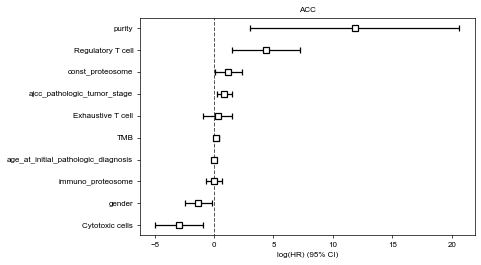

LIHC.tsv


<lifelines.CoxPHFitter: fitted with 327 total observations, 219 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 108
   partial log-likelihood = -519.27
         time fit was run = 2022-08-29 12:29:14 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.30       1.35       0.20            -0.10             0.70                 0.91                 2.01
immuno_proteosome                     0.08       1.09       0.13            -0.17             0.33                 0.85                 1.40
Regulatory T cell                     0.64       1.90       0.43            -0.20             1.48                 0.82                 4.40
Exhaustive T cell                     0.33       1.39       0.26            -0.18             0.83                 0.84                 2.29
Cytotoxic cells                      -1.39       0.25       0.34            -2.05            -0.73                 0.13                 0.48
age_at_initial_pathologic_diagnosis   0.01       1.01       0.01            -0.01             0.02                 0.99                 1.03
gender                                0.29       1.34       0.21            -0.12             0.71                 0.88                 2.03
ajcc_pathologic_tumor_stage           0.44       1.55       0.11             0.22             0.66                 1.25                 1.93
TMB                                   0.07       1.07       0.04            -0.01             0.14                 0.99                 1.15
purity                                0.61       1.85       0.63            -0.63             1.86                 0.53                 6.41

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     1.48   0.14       2.86
immuno_proteosome                    0.66   0.51       0.97
Regulatory T cell                    1.50   0.13       2.91
Exhaustive T cell                    1.27   0.20       2.30
Cytotoxic cells                     -4.10 <0.005      14.59
age_at_initial_pathologic_diagnosis  1.16   0.24       2.03
gender                               1.37   0.17       2.56
ajcc_pathologic_tumor_stage          3.96 <0.005      13.72
TMB                                  1.78   0.07       3.75
purity                               0.97   0.33       1.59
---
Concordance = 0.50
Partial AIC = 1058.54
log-likelihood ratio test = 50.27 on 10 df
-log2(p) of ll-ratio test = 22.01

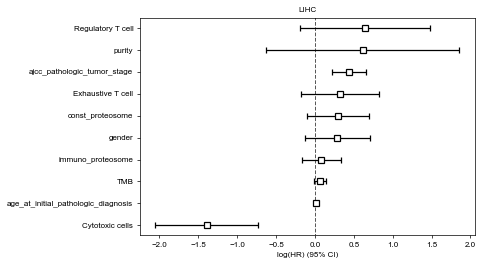

MESO.tsv


<lifelines.CoxPHFitter: fitted with 80 total observations, 12 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 80
number of events observed = 68
   partial log-likelihood = -229.77
         time fit was run = 2022-08-29 12:29:14 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      1.05       2.86       0.39             0.28             1.82                 1.32                 6.17
immuno_proteosome                    -0.80       0.45       0.27            -1.33            -0.27                 0.26                 0.76
Regulatory T cell                     0.35       1.42       0.43            -0.48             1.19                 0.62                 3.27
Exhaustive T cell                     0.37       1.45       0.32            -0.26             1.00                 0.77                 2.71
Cytotoxic cells                      -0.59       0.55       0.49            -1.56             0.38                 0.21                 1.46
age_at_initial_pathologic_diagnosis   0.00       1.00       0.02            -0.03             0.04                 0.97                 1.04
gender                                0.50       1.65       0.34            -0.17             1.18                 0.84                 3.25
ajcc_pathologic_tumor_stage          -0.14       0.87       0.15            -0.44             0.15                 0.64                 1.17
TMB                                   0.08       1.08       0.18            -0.28             0.43                 0.75                 1.54
purity                               -2.06       0.13       0.77            -3.57            -0.55                 0.03                 0.57

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     2.67   0.01       7.04
immuno_proteosome                   -2.98 <0.005       8.44
Regulatory T cell                    0.83   0.41       1.30
Exhaustive T cell                    1.16   0.25       2.01
Cytotoxic cells                     -1.20   0.23       2.12
age_at_initial_pathologic_diagnosis  0.12   0.90       0.15
gender                               1.46   0.14       2.80
ajcc_pathologic_tumor_stage         -0.95   0.34       1.55
TMB                                  0.42   0.68       0.56
purity                              -2.68   0.01       7.09
---
Concordance = 0.65
Partial AIC = 479.54
log-likelihood ratio test = 23.78 on 10 df
-log2(p) of ll-ratio test = 6.93

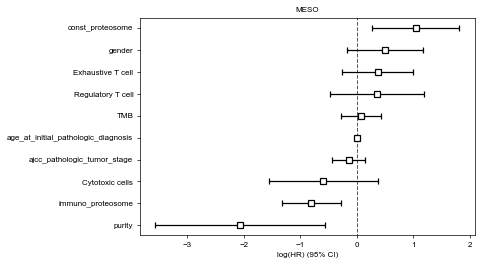

STAD.tsv


<lifelines.CoxPHFitter: fitted with 359 total observations, 224 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 359
number of events observed = 135
   partial log-likelihood = -676.85
         time fit was run = 2022-08-29 12:29:16 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.10       1.11       0.21            -0.30             0.51                 0.74                 1.67
immuno_proteosome                    -0.06       0.95       0.14            -0.33             0.22                 0.72                 1.24
Regulatory T cell                     0.35       1.42       0.32            -0.28             0.98                 0.75                 2.66
Exhaustive T cell                    -0.34       0.71       0.29            -0.90             0.22                 0.41                 1.24
Cytotoxic cells                       0.33       1.39       0.41            -0.48             1.13                 0.62                 3.10
age_at_initial_pathologic_diagnosis   0.03       1.03       0.01             0.01             0.05                 1.01                 1.05
gender                                0.01       1.01       0.20            -0.38             0.39                 0.69                 1.47
ajcc_pathologic_tumor_stage           0.63       1.88       0.12             0.40             0.86                 1.49                 2.37
TMB                                  -0.03       0.97       0.01            -0.05            -0.00                 0.95                 1.00
purity                               -0.26       0.77       0.54            -1.32             0.79                 0.27                 2.21

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     0.50   0.62       0.70
immuno_proteosome                   -0.40   0.69       0.54
Regulatory T cell                    1.08   0.28       1.83
Exhaustive T cell                   -1.20   0.23       2.11
Cytotoxic cells                      0.80   0.42       1.24
age_at_initial_pathologic_diagnosis  3.40 <0.005      10.55
gender                               0.03   0.98       0.03
ajcc_pathologic_tumor_stage          5.34 <0.005      23.38
TMB                                 -2.23   0.03       5.27
purity                              -0.48   0.63       0.67
---
Concordance = 0.68
Partial AIC = 1373.70
log-likelihood ratio test = 53.93 on 10 df
-log2(p) of ll-ratio test = 24.26

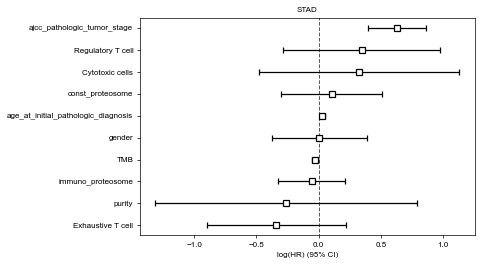

ESCA.tsv


<lifelines.CoxPHFitter: fitted with 141 total observations, 85 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 141
number of events observed = 56
   partial log-likelihood = -210.45
         time fit was run = 2022-08-29 12:29:17 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.05       1.05       0.31            -0.56             0.66                 0.57                 1.93
immuno_proteosome                     0.00       1.00       0.20            -0.39             0.39                 0.68                 1.48
Regulatory T cell                     0.47       1.60       0.48            -0.46             1.41                 0.63                 4.08
Exhaustive T cell                    -0.02       0.98       0.53            -1.07             1.03                 0.34                 2.80
Cytotoxic cells                       0.88       2.41       0.71            -0.51             2.26                 0.60                 9.60
age_at_initial_pathologic_diagnosis   0.02       1.02       0.01            -0.01             0.04                 0.99                 1.04
gender                               -0.47       0.63       0.50            -1.44             0.50                 0.24                 1.65
ajcc_pathologic_tumor_stage           0.86       2.36       0.20             0.46             1.25                 1.59                 3.49
TMB                                  -0.00       1.00       0.03            -0.07             0.06                 0.93                 1.06
purity                                2.53      12.50       1.11             0.36             4.69                 1.43               109.07

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     0.16   0.87       0.20
immuno_proteosome                    0.01   0.99       0.01
Regulatory T cell                    0.99   0.32       1.64
Exhaustive T cell                   -0.03   0.97       0.04
Cytotoxic cells                      1.24   0.21       2.23
age_at_initial_pathologic_diagnosis  1.10   0.27       1.89
gender                              -0.94   0.35       1.53
ajcc_pathologic_tumor_stage          4.27 <0.005      15.67
TMB                                 -0.11   0.91       0.13
purity                               2.28   0.02       5.49
---
Concordance = 0.68
Partial AIC = 440.90
log-likelihood ratio test = 28.62 on 10 df
-log2(p) of ll-ratio test = 9.44

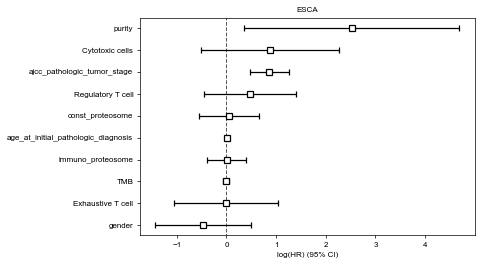

HNSC.tsv


<lifelines.CoxPHFitter: fitted with 421 total observations, 243 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 421
number of events observed = 178
   partial log-likelihood = -924.77
         time fit was run = 2022-08-29 12:29:19 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.00       1.00       0.18            -0.35             0.36                 0.70                 1.43
immuno_proteosome                     0.22       1.24       0.13            -0.03             0.46                 0.97                 1.59
Regulatory T cell                     0.45       1.57       0.33            -0.20             1.09                 0.82                 2.99
Exhaustive T cell                    -0.45       0.64       0.29            -1.03             0.13                 0.36                 1.13
Cytotoxic cells                      -0.52       0.59       0.35            -1.22             0.17                 0.30                 1.18
age_at_initial_pathologic_diagnosis   0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
gender                                0.23       1.26       0.17            -0.11             0.57                 0.90                 1.77
ajcc_pathologic_tumor_stage           0.38       1.47       0.10             0.19             0.57                 1.21                 1.78
TMB                                   0.00       1.00       0.02            -0.04             0.05                 0.96                 1.05
purity                                0.67       1.96       0.52            -0.35             1.69                 0.70                 5.43

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     0.02   0.99       0.02
immuno_proteosome                    1.73   0.08       3.59
Regulatory T cell                    1.37   0.17       2.54
Exhaustive T cell                   -1.53   0.13       2.99
Cytotoxic cells                     -1.48   0.14       2.86
age_at_initial_pathologic_diagnosis  3.46 <0.005      10.87
gender                               1.35   0.18       2.49
ajcc_pathologic_tumor_stage          3.96 <0.005      13.70
TMB                                  0.07   0.94       0.08
purity                               1.29   0.20       2.33
---
Concordance = 0.50
Partial AIC = 1869.55
log-likelihood ratio test = 42.56 on 10 df
-log2(p) of ll-ratio test = 17.36

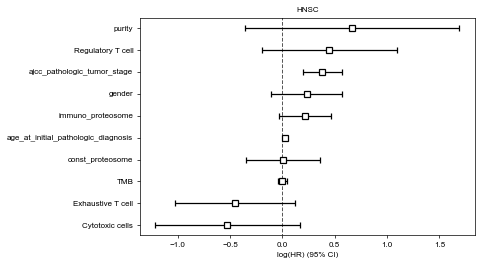

COAD.tsv


<lifelines.CoxPHFitter: fitted with 259 total observations, 199 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 259
number of events observed = 60
   partial log-likelihood = -262.73
         time fit was run = 2022-08-29 12:29:20 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.35       1.42       0.46            -0.55             1.26                 0.58                 3.52
immuno_proteosome                    -0.35       0.70       0.26            -0.86             0.16                 0.42                 1.17
Regulatory T cell                     0.26       1.30       0.54            -0.80             1.33                 0.45                 3.76
Exhaustive T cell                     0.16       1.17       0.50            -0.82             1.14                 0.44                 3.13
Cytotoxic cells                       0.44       1.55       0.73            -0.98             1.86                 0.37                 6.43
age_at_initial_pathologic_diagnosis   0.04       1.04       0.01             0.01             0.06                 1.01                 1.06
gender                               -0.27       0.76       0.28            -0.83             0.28                 0.44                 1.33
ajcc_pathologic_tumor_stage           0.98       2.66       0.19             0.61             1.34                 1.85                 3.83
TMB                                   0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
purity                               -0.01       0.99       0.84            -1.65             1.64                 0.19                 5.13

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     0.77   0.44       1.18
immuno_proteosome                   -1.35   0.18       2.50
Regulatory T cell                    0.48   0.63       0.67
Exhaustive T cell                    0.32   0.75       0.42
Cytotoxic cells                      0.60   0.55       0.88
age_at_initial_pathologic_diagnosis  3.03 <0.005       8.68
gender                              -0.96   0.34       1.56
ajcc_pathologic_tumor_stage          5.25 <0.005      22.63
TMB                                  0.41   0.68       0.56
purity                              -0.01   0.99       0.01
---
Concordance = 0.50
Partial AIC = 545.45
log-likelihood ratio test = 39.15 on 10 df
-log2(p) of ll-ratio test = 15.35

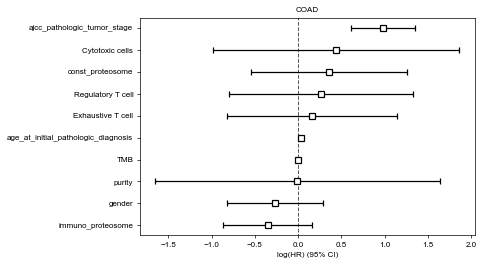

PAAD.tsv


<lifelines.CoxPHFitter: fitted with 141 total observations, 59 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 141
number of events observed = 82
   partial log-likelihood = -330.39
         time fit was run = 2022-08-29 12:29:21 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.09       1.10       0.36            -0.61             0.80                 0.54                 2.22
immuno_proteosome                     0.28       1.32       0.29            -0.29             0.85                 0.75                 2.34
Regulatory T cell                     0.17       1.18       0.44            -0.71             1.04                 0.49                 2.82
Exhaustive T cell                    -0.22       0.80       0.36            -0.92             0.47                 0.40                 1.61
Cytotoxic cells                       0.30       1.35       0.46            -0.60             1.20                 0.55                 3.31
age_at_initial_pathologic_diagnosis   0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
gender                                0.20       1.23       0.25            -0.29             0.70                 0.75                 2.00
ajcc_pathologic_tumor_stage          -0.12       0.89       0.25            -0.61             0.37                 0.55                 1.45
TMB                                   0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
purity                               -1.00       0.37       0.54            -2.06             0.06                 0.13                 1.06

                                        z    p   -log2(p)
covariate                                                
const_proteosome                     0.26 0.80       0.33
immuno_proteosome                    0.97 0.33       1.58
Regulatory T cell                    0.37 0.71       0.49
Exhaustive T cell                   -0.62 0.53       0.91
Cytotoxic cells                      0.65 0.51       0.96
age_at_initial_pathologic_diagnosis  1.06 0.29       1.79
gender                               0.81 0.42       1.26
ajcc_pathologic_tumor_stage         -0.47 0.63       0.66
TMB                                  0.08 0.94       0.09
purity                              -1.85 0.06       3.97
---
Concordance = 0.50
Partial AIC = 680.78
log-likelihood ratio test = 10.27 on 10 df
-log2(p) of ll-ratio test = 1.26

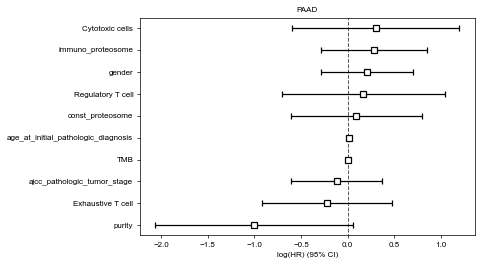

UVM.tsv


<lifelines.CoxPHFitter: fitted with 79 total observations, 57 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 79
number of events observed = 22
   partial log-likelihood = -62.71
         time fit was run = 2022-08-29 12:29:22 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.92       2.51       1.13            -1.29             3.13                 0.27                22.87
immuno_proteosome                    -0.00       1.00       0.37            -0.73             0.72                 0.48                 2.05
Regulatory T cell                    -1.24       0.29       1.02            -3.25             0.77                 0.04                 2.16
Exhaustive T cell                     2.30      10.00       0.88             0.58             4.02                 1.79                55.80
Cytotoxic cells                       0.53       1.70       0.97            -1.37             2.43                 0.26                11.31
age_at_initial_pathologic_diagnosis   0.06       1.06       0.02             0.01             0.11                 1.01                 1.11
gender                               -0.04       0.96       0.51            -1.04             0.96                 0.35                 2.60
ajcc_pathologic_tumor_stage           1.56       4.75       0.54             0.51             2.61                 1.66                13.63
TMB                                  -0.24       0.79       0.92            -2.03             1.56                 0.13                 4.74
purity                                4.36      78.17       2.61            -0.76             9.47                 0.47             13018.47

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     0.81   0.42       1.27
immuno_proteosome                   -0.01   0.99       0.01
Regulatory T cell                   -1.21   0.23       2.14
Exhaustive T cell                    2.63   0.01       6.85
Cytotoxic cells                      0.55   0.58       0.78
age_at_initial_pathologic_diagnosis  2.41   0.02       5.97
gender                              -0.08   0.93       0.10
ajcc_pathologic_tumor_stage          2.90 <0.005       8.08
TMB                                 -0.26   0.79       0.33
purity                               1.67   0.09       3.40
---
Concordance = 0.84
Partial AIC = 145.43
log-likelihood ratio test = 33.92 on 10 df
-log2(p) of ll-ratio test = 12.36

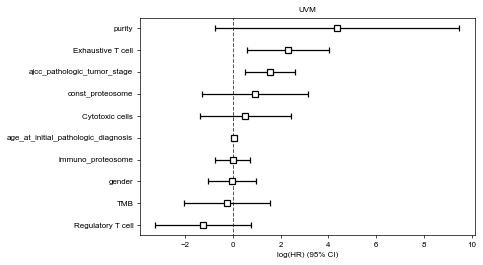

SARC.tsv
LUSC.tsv


<lifelines.CoxPHFitter: fitted with 447 total observations, 253 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 447
number of events observed = 194
   partial log-likelihood = -995.82
         time fit was run = 2022-08-29 12:29:24 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                     -0.07       0.94       0.18            -0.42             0.29                 0.65                 1.34
immuno_proteosome                     0.14       1.15       0.12            -0.10             0.37                 0.91                 1.45
Regulatory T cell                     0.73       2.08       0.29             0.16             1.30                 1.18                 3.67
Exhaustive T cell                    -0.21       0.81       0.28            -0.76             0.35                 0.47                 1.42
Cytotoxic cells                      -0.09       0.92       0.38            -0.84             0.67                 0.43                 1.95
age_at_initial_pathologic_diagnosis   0.02       1.02       0.01            -0.00             0.03                 1.00                 1.04
gender                               -0.22       0.80       0.17            -0.55             0.12                 0.57                 1.13
ajcc_pathologic_tumor_stage           0.26       1.29       0.09             0.09             0.43                 1.09                 1.53
TMB                                  -0.01       0.99       0.02            -0.04             0.03                 0.96                 1.03
purity                                0.45       1.57       0.49            -0.51             1.41                 0.60                 4.09

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                    -0.37   0.71       0.48
immuno_proteosome                    1.13   0.26       1.96
Regulatory T cell                    2.51   0.01       6.39
Exhaustive T cell                   -0.73   0.47       1.10
Cytotoxic cells                     -0.22   0.82       0.28
age_at_initial_pathologic_diagnosis  1.91   0.06       4.15
gender                              -1.27   0.20       2.29
ajcc_pathologic_tumor_stage          2.96 <0.005       8.33
TMB                                 -0.39   0.69       0.53
purity                               0.92   0.36       1.49
---
Concordance = 0.62
Partial AIC = 2011.65
log-likelihood ratio test = 24.76 on 10 df
-log2(p) of ll-ratio test = 7.42

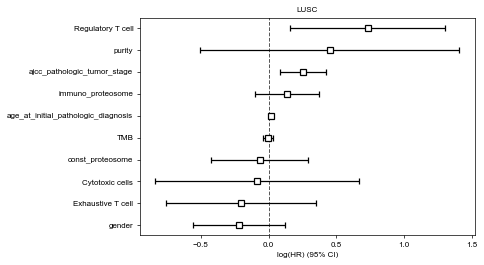

BLCA.tsv


<lifelines.CoxPHFitter: fitted with 390 total observations, 218 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 390
number of events observed = 172
   partial log-likelihood = -868.58
         time fit was run = 2022-08-29 12:29:26 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.36       1.43       0.20            -0.02             0.75                 0.98                 2.11
immuno_proteosome                    -0.25       0.78       0.11            -0.47            -0.03                 0.63                 0.97
Regulatory T cell                     0.90       2.46       0.33             0.25             1.55                 1.28                 4.72
Exhaustive T cell                    -0.08       0.93       0.31            -0.68             0.53                 0.50                 1.71
Cytotoxic cells                      -0.03       0.97       0.37            -0.75             0.69                 0.47                 1.99
age_at_initial_pathologic_diagnosis   0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
gender                                0.09       1.10       0.17            -0.25             0.43                 0.78                 1.54
ajcc_pathologic_tumor_stage           0.40       1.50       0.10             0.20             0.60                 1.23                 1.83
TMB                                  -0.09       0.91       0.03            -0.15            -0.04                 0.86                 0.96
purity                                0.17       1.19       0.47            -0.75             1.10                 0.47                 3.01

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     1.84   0.07       3.93
immuno_proteosome                   -2.20   0.03       5.15
Regulatory T cell                    2.71   0.01       7.24
Exhaustive T cell                   -0.24   0.81       0.31
Cytotoxic cells                     -0.09   0.93       0.10
age_at_initial_pathologic_diagnosis  2.63   0.01       6.88
gender                               0.54   0.59       0.76
ajcc_pathologic_tumor_stage          3.95 <0.005      13.65
TMB                                 -3.52 <0.005      11.19
purity                               0.37   0.71       0.49
---
Concordance = 0.71
Partial AIC = 1757.16
log-likelihood ratio test = 85.18 on 10 df
-log2(p) of ll-ratio test = 44.24

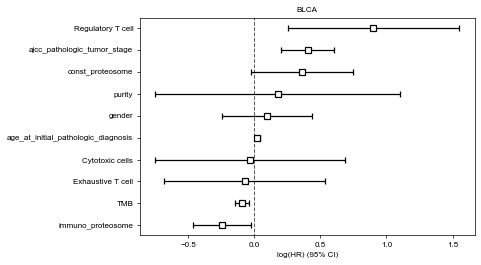

LGG.tsv
CHOL.tsv


<lifelines.CoxPHFitter: fitted with 36 total observations, 18 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 36
number of events observed = 18
   partial log-likelihood = -46.82
         time fit was run = 2022-08-29 12:29:28 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      1.19       3.29       0.75            -0.29             2.67                 0.75                14.40
immuno_proteosome                    -0.08       0.92       0.40            -0.87             0.70                 0.42                 2.02
Regulatory T cell                    -0.65       0.52       1.09            -2.79             1.48                 0.06                 4.41
Exhaustive T cell                     0.83       2.30       0.95            -1.03             2.70                 0.36                14.89
Cytotoxic cells                      -2.16       0.12       1.00            -4.13            -0.19                 0.02                 0.83
age_at_initial_pathologic_diagnosis  -0.01       0.99       0.03            -0.06             0.04                 0.94                 1.04
gender                                0.34       1.41       0.70            -1.04             1.72                 0.35                 5.60
ajcc_pathologic_tumor_stage           0.29       1.34       0.23            -0.15             0.74                 0.86                 2.09
TMB                                   0.31       1.36       0.14             0.03             0.58                 1.04                 1.79
purity                               -2.92       0.05       2.27            -7.38             1.54                 0.00                 4.66

                                        z    p   -log2(p)
covariate                                                
const_proteosome                     1.58 0.11       3.13
immuno_proteosome                   -0.21 0.84       0.26
Regulatory T cell                   -0.60 0.55       0.86
Exhaustive T cell                    0.88 0.38       1.39
Cytotoxic cells                     -2.15 0.03       4.99
age_at_initial_pathologic_diagnosis -0.39 0.70       0.52
gender                               0.49 0.63       0.68
ajcc_pathologic_tumor_stage          1.29 0.20       2.33
TMB                                  2.21 0.03       5.19
purity                              -1.28 0.20       2.33
---
Concordance = 0.72
Partial AIC = 113.64
log-likelihood ratio test = 11.42 on 10 df
-log2(p) of ll-ratio test = 1.62

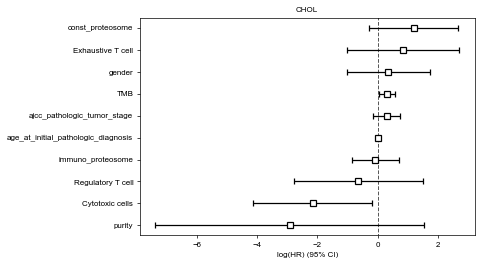

LAML.tsv
GBM.tsv
SKCM.tsv


<lifelines.CoxPHFitter: fitted with 377 total observations, 209 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 377
number of events observed = 168
   partial log-likelihood = -799.86
         time fit was run = 2022-08-29 12:29:31 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.59       1.81       0.18             0.24             0.94                 1.28                 2.56
immuno_proteosome                    -0.02       0.98       0.11            -0.24             0.20                 0.78                 1.22
Regulatory T cell                     0.48       1.62       0.36            -0.23             1.19                 0.80                 3.30
Exhaustive T cell                    -1.29       0.27       0.32            -1.93            -0.66                 0.15                 0.52
Cytotoxic cells                       0.63       1.88       0.36            -0.08             1.34                 0.92                 3.82
age_at_initial_pathologic_diagnosis   0.02       1.02       0.01             0.01             0.03                 1.01                 1.03
gender                               -0.19       0.82       0.18            -0.54             0.15                 0.58                 1.17
ajcc_pathologic_tumor_stage           0.46       1.58       0.10             0.26             0.66                 1.29                 1.93
TMB                                  -0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
purity                                0.55       1.73       0.46            -0.35             1.44                 0.71                 4.24

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     3.34 <0.005      10.20
immuno_proteosome                   -0.19   0.85       0.24
Regulatory T cell                    1.33   0.18       2.45
Exhaustive T cell                   -4.02 <0.005      14.07
Cytotoxic cells                      1.74   0.08       3.62
age_at_initial_pathologic_diagnosis  3.54 <0.005      11.26
gender                              -1.09   0.27       1.87
ajcc_pathologic_tumor_stage          4.48 <0.005      17.02
TMB                                 -0.45   0.65       0.62
purity                               1.20   0.23       2.12
---
Concordance = 0.50
Partial AIC = 1619.73
log-likelihood ratio test = 81.85 on 10 df
-log2(p) of ll-ratio test = 42.06

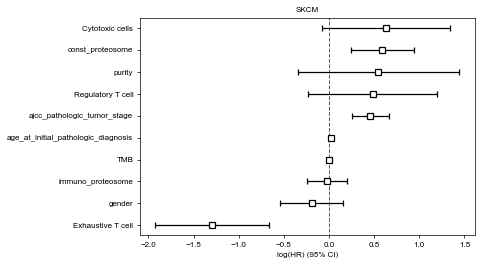

KIRP.tsv


<lifelines.CoxPHFitter: fitted with 244 total observations, 210 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 244
number of events observed = 34
   partial log-likelihood = -136.36
         time fit was run = 2022-08-29 12:29:32 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                     -0.66       0.52       0.63            -1.90             0.58                 0.15                 1.78
immuno_proteosome                    -0.64       0.53       0.41            -1.45             0.17                 0.23                 1.19
Regulatory T cell                     0.32       1.37       0.77            -1.20             1.83                 0.30                 6.24
Exhaustive T cell                     1.17       3.22       0.50             0.20             2.14                 1.22                 8.52
Cytotoxic cells                       0.51       1.66       0.77            -1.00             2.01                 0.37                 7.48
age_at_initial_pathologic_diagnosis   0.01       1.01       0.01            -0.01             0.04                 0.99                 1.04
gender                                0.17       1.19       0.42            -0.66             1.00                 0.52                 2.72
ajcc_pathologic_tumor_stage           1.12       3.08       0.19             0.76             1.49                 2.14                 4.43
TMB                                  -0.17       0.84       0.14            -0.45             0.11                 0.64                 1.12
purity                                1.42       4.15       1.49            -1.49             4.34                 0.23                76.46

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                    -1.05   0.29       1.76
immuno_proteosome                   -1.54   0.12       3.02
Regulatory T cell                    0.41   0.68       0.55
Exhaustive T cell                    2.36   0.02       5.78
Cytotoxic cells                      0.66   0.51       0.97
age_at_initial_pathologic_diagnosis  1.02   0.31       1.69
gender                               0.40   0.69       0.54
ajcc_pathologic_tumor_stage          6.04 <0.005      29.30
TMB                                 -1.18   0.24       2.08
purity                               0.96   0.34       1.56
---
Concordance = 0.50
Partial AIC = 292.73
log-likelihood ratio test = 51.42 on 10 df
-log2(p) of ll-ratio test = 22.71

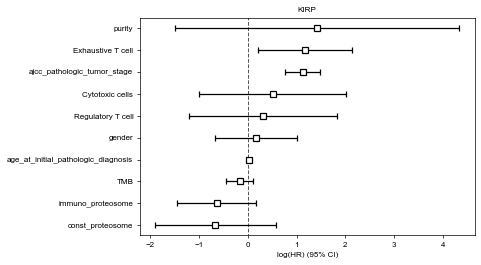

BRCA.tsv


<lifelines.CoxPHFitter: fitted with 961 total observations, 836 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 961
number of events observed = 125
   partial log-likelihood = -658.58
         time fit was run = 2022-08-29 12:29:36 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.17       1.18       0.23            -0.29             0.62                 0.75                 1.86
immuno_proteosome                    -0.26       0.77       0.15            -0.54             0.03                 0.58                 1.03
Regulatory T cell                     1.20       3.32       0.37             0.47             1.92                 1.61                 6.85
Exhaustive T cell                    -0.14       0.87       0.30            -0.73             0.45                 0.48                 1.57
Cytotoxic cells                      -0.08       0.92       0.40            -0.86             0.70                 0.42                 2.01
age_at_initial_pathologic_diagnosis   0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
gender                                0.13       1.13       1.01            -1.85             2.10                 0.16                 8.17
ajcc_pathologic_tumor_stage           0.74       2.10       0.12             0.51             0.97                 1.67                 2.64
TMB                                   0.04       1.04       0.01             0.01             0.06                 1.01                 1.06
purity                               -0.14       0.87       0.64            -1.39             1.11                 0.25                 3.02

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     0.71   0.48       1.07
immuno_proteosome                   -1.78   0.08       3.72
Regulatory T cell                    3.24 <0.005       9.70
Exhaustive T cell                   -0.46   0.65       0.63
Cytotoxic cells                     -0.20   0.84       0.25
age_at_initial_pathologic_diagnosis  4.59 <0.005      17.78
gender                               0.13   0.90       0.15
ajcc_pathologic_tumor_stage          6.32 <0.005      31.79
TMB                                  2.74   0.01       7.34
purity                              -0.22   0.82       0.28
---
Concordance = 0.50
Partial AIC = 1337.17
log-likelihood ratio test = 77.28 on 10 df
-log2(p) of ll-ratio test = 39.09

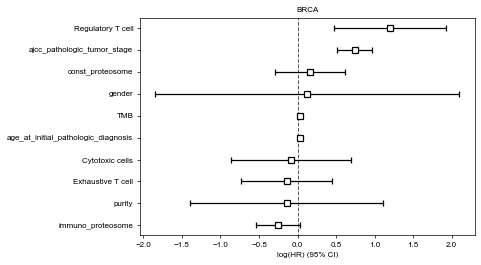

KIRC.tsv


<lifelines.CoxPHFitter: fitted with 342 total observations, 251 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 342
number of events observed = 91
   partial log-likelihood = -423.33
         time fit was run = 2022-08-29 12:29:39 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.50       1.64       0.32            -0.13             1.13                 0.87                 3.08
immuno_proteosome                     0.11       1.12       0.24            -0.36             0.59                 0.69                 1.81
Regulatory T cell                    -0.35       0.70       0.46            -1.25             0.54                 0.29                 1.72
Exhaustive T cell                    -0.19       0.83       0.30            -0.77             0.39                 0.47                 1.48
Cytotoxic cells                      -0.50       0.60       0.42            -1.32             0.31                 0.27                 1.37
age_at_initial_pathologic_diagnosis   0.05       1.05       0.01             0.03             0.07                 1.03                 1.07
gender                                0.02       1.02       0.23            -0.44             0.48                 0.65                 1.61
ajcc_pathologic_tumor_stage           0.70       2.01       0.11             0.49             0.91                 1.64                 2.48
TMB                                   0.22       1.25       0.08             0.08             0.37                 1.08                 1.45
purity                               -1.10       0.33       0.88            -2.82             0.62                 0.06                 1.85

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     1.54   0.12       3.03
immuno_proteosome                    0.47   0.64       0.65
Regulatory T cell                   -0.77   0.44       1.19
Exhaustive T cell                   -0.63   0.53       0.93
Cytotoxic cells                     -1.21   0.23       2.13
age_at_initial_pathologic_diagnosis  4.46 <0.005      16.90
gender                               0.09   0.93       0.11
ajcc_pathologic_tumor_stage          6.65 <0.005      35.03
TMB                                  2.97 <0.005       8.41
purity                              -1.26   0.21       2.26
---
Concordance = 0.50
Partial AIC = 866.66
log-likelihood ratio test = 91.50 on 10 df
-log2(p) of ll-ratio test = 48.40

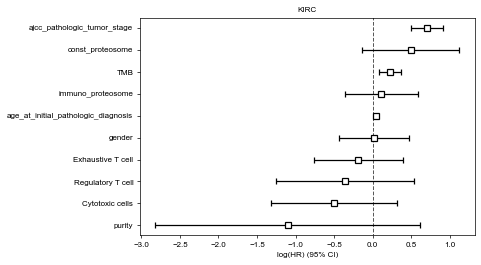

LUAD.tsv


<lifelines.CoxPHFitter: fitted with 474 total observations, 309 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 474
number of events observed = 165
   partial log-likelihood = -843.86
         time fit was run = 2022-08-29 12:29:41 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      0.52       1.69       0.19             0.15             0.89                 1.17                 2.44
immuno_proteosome                     0.15       1.16       0.12            -0.10             0.39                 0.91                 1.48
Regulatory T cell                     0.02       1.02       0.34            -0.64             0.68                 0.53                 1.97
Exhaustive T cell                    -0.06       0.94       0.27            -0.59             0.47                 0.55                 1.61
Cytotoxic cells                      -0.54       0.58       0.33            -1.19             0.11                 0.31                 1.11
age_at_initial_pathologic_diagnosis   0.02       1.02       0.01             0.00             0.03                 1.00                 1.03
gender                                0.14       1.15       0.17            -0.18             0.47                 0.83                 1.59
ajcc_pathologic_tumor_stage           0.53       1.69       0.08             0.38             0.68                 1.46                 1.97
TMB                                   0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
purity                                0.68       1.98       0.55            -0.40             1.77                 0.67                 5.88

                                        z      p   -log2(p)
covariate                                                  
const_proteosome                     2.78   0.01       7.51
immuno_proteosome                    1.18   0.24       2.08
Regulatory T cell                    0.05   0.96       0.06
Exhaustive T cell                   -0.22   0.83       0.27
Cytotoxic cells                     -1.63   0.10       3.28
age_at_initial_pathologic_diagnosis  1.98   0.05       4.39
gender                               0.85   0.40       1.33
ajcc_pathologic_tumor_stage          6.92 <0.005      37.67
TMB                                  0.17   0.87       0.20
purity                               1.23   0.22       2.20
---
Concordance = 0.50
Partial AIC = 1707.72
log-likelihood ratio test = 64.22 on 10 df
-log2(p) of ll-ratio test = 30.71

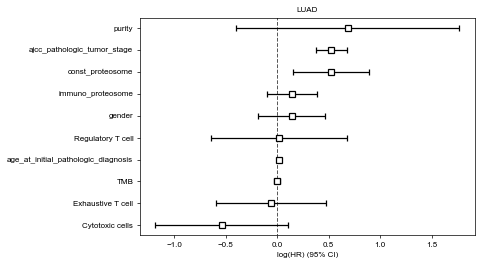

READ.tsv


<lifelines.CoxPHFitter: fitted with 80 total observations, 66 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 80
number of events observed = 14
   partial log-likelihood = -35.65
         time fit was run = 2022-08-29 12:29:41 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
const_proteosome                      2.44      11.51       1.13             0.22             4.67                 1.25               106.29
immuno_proteosome                    -1.18       0.31       0.76            -2.66             0.31                 0.07                 1.37
Regulatory T cell                     3.45      31.49       1.66             0.20             6.70                 1.22               810.27
Exhaustive T cell                     1.01       2.74       1.33            -1.59             3.61                 0.20                37.09
Cytotoxic cells                      -0.18       0.83       1.85            -3.80             3.44                 0.02                31.05
age_at_initial_pathologic_diagnosis   0.10       1.11       0.04             0.02             0.18                 1.02                 1.20
gender                               -0.10       0.91       0.85            -1.77             1.58                 0.17                 4.84
ajcc_pathologic_tumor_stage           0.39       1.48       0.41            -0.41             1.19                 0.66                 3.30
TMB                                  -0.07       0.94       0.17            -0.40             0.27                 0.67                 1.31
purity                                5.53     251.66       3.15            -0.65            11.70                 0.52             1.21e+05

                                        z    p   -log2(p)
covariate                                                
const_proteosome                     2.15 0.03       5.00
immuno_proteosome                   -1.55 0.12       3.04
Regulatory T cell                    2.08 0.04       4.74
Exhaustive T cell                    0.76 0.45       1.16
Cytotoxic cells                     -0.10 0.92       0.12
age_at_initial_pathologic_diagnosis  2.56 0.01       6.56
gender                              -0.11 0.91       0.14
ajcc_pathologic_tumor_stage          0.95 0.34       1.56
TMB                                 -0.38 0.70       0.51
purity                               1.75 0.08       3.66
---
Concordance = 0.85
Partial AIC = 91.29
log-likelihood ratio test = 25.13 on 10 df
-log2(p) of ll-ratio test = 7.62

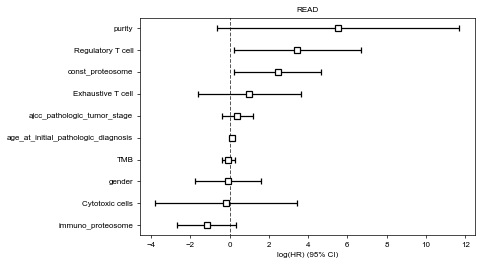

In [26]:
######## tumor purity information####################################################################
tumor_purity_df=pd.read_csv("/workspace/projects/immunoproteasome/data/purity_data/TCGA_mastercalls.abs_tables_JSedit.fixed.txt",sep='\t')
tumor_purity_df['sample_id']=tumor_purity_df['array'].str.split('-').str[0:3].str.join('.')
tumor_purity_df=tumor_purity_df[['purity','sample_id']]
tumor_purity_df=tumor_purity_df.set_index('sample_id')
#### Mutational file ##############################################################################
tumor_mutation_df = pd.read_csv('/workspace/projects/immunoproteasome/data/tcga_cohort.txt', sep="\t",header = 0)
tumor_mutation_df['TMB']=tumor_mutation_df['total']/50
tumor_mutation_df['Tumor_Sample_Barcode']=tumor_mutation_df['Tumor_Sample_Barcode'].str.split('-').str[0:3].str.join('.')
tumor_mutation_df=tumor_mutation_df.set_index('Tumor_Sample_Barcode')
######### stage age gender included into the list of variables####################################
xls_1 = pd.ExcelFile('/workspace/shared/dataset/tcga_exome/tcga_cdr/mmc1.xlsx')
df_1 = xls_1.parse(0)
df_age_sex_grade_info=df_1[['bcr_patient_barcode','type','age_at_initial_pathologic_diagnosis','gender','ajcc_pathologic_tumor_stage','OS','OS.time']]
df_age_sex_grade_info['bcr_patient_barcode']=df_age_sex_grade_info['bcr_patient_barcode'].str.split('-').str[0:3].str.join('.')
df_age_sex_grade_info=df_age_sex_grade_info.set_index('bcr_patient_barcode')
df_age_sex_grade_info['gender']=df_age_sex_grade_info['gender'].replace(['MALE','FEMALE'],[1,2])
df_age_sex_grade_info['ajcc_pathologic_tumor_stage'] = df_age_sex_grade_info['ajcc_pathologic_tumor_stage'].replace(['Stage IA','Stage IB','Stage IIA','Stage IIB','Stage IIC','Stage IIIA','Stage IIIB','Stage IIIC','Stage IVA','Stage IVB','Stage IVC'],['Stage I','Stage I','Stage II','Stage II','Stage II','Stage III','Stage III','Stage III','Stage IV','Stage IV','Stage IV'])
df_age_sex_grade_info['ajcc_pathologic_tumor_stage'] = df_age_sex_grade_info['ajcc_pathologic_tumor_stage'].replace(['Stage I','Stage II','Stage III','Stage IV'],[1,2,3,4])
##################################################################################################

input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"
input_path3="/workspace/projects/immunoproteasome/v1_copy_4/03_output/"
cytotoxic_hazard_summary=[]
tumor_tissue1=[]

tumor_tissue.remove('UCS.tsv')
tumor_tissue.remove('OV.tsv')
tumor_tissue.remove('CESC.tsv')
tumor_tissue.remove('PRAD.tsv')
tumor_tissue.remove('UCEC.tsv')

for i in range(len(tumor_tissue)):
    print(tumor_tissue[i])
    gene_data_frame=pd.read_csv(input_path1+tumor_tissue[i],sep='\t',index_col=0)
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=gene_data_frame.T+1
    
    log_gene_data_frame=np.log2(gene_data_frame)
    log_gene_data_frame['const_proteosome']=(1/3)*(log_gene_data_frame['PSMB5']+log_gene_data_frame['PSMB6']+log_gene_data_frame['PSMB7'])
    log_gene_data_frame['immuno_proteosome']=(1/3)*(log_gene_data_frame['PSMB8']+log_gene_data_frame['PSMB9']+log_gene_data_frame['PSMB10'])
    
    immune_gsva_score=pd.read_csv(input_path3+'GSVA_'+'immune_cells_'+tumor_tissue[i],sep='\t')
    
    df3=pd.merge(log_gene_data_frame[['const_proteosome','immuno_proteosome']],immune_gsva_score.T,left_index=True, right_index=True)
    df_immunogenicity_proteasome_immune_cells_score1=pd.merge(df3,tumor_purity_df,left_index=True, right_index=True)
    df_immunogenicity_proteasome_immune_cells_score2=pd.merge(df_age_sex_grade_info,df_immunogenicity_proteasome_immune_cells_score1,left_index=True, right_index=True)
    df_immunogenicity_proteasome_immune_cells_score3=pd.merge(tumor_mutation_df,df_immunogenicity_proteasome_immune_cells_score2,left_index=True, right_index=True)
    
    #variables=['const_proteosome','Regulatory T cell','Cytotoxic cells','Exhaustive T cell','OS', 'OS.time']
    variables=['const_proteosome','immuno_proteosome','Regulatory T cell','Exhaustive T cell','Cytotoxic cells','age_at_initial_pathologic_diagnosis','gender','ajcc_pathologic_tumor_stage','TMB','purity','OS', 'OS.time']
    #-------- keep immuno_proteaosme and change the other varaible iteratively to collect the HR ratio
    #df_subset=df_immunogenicity_proteasome_immune_cells_score3[['const_proteosome','ajcc_pathologic_tumor_stage','OS','OS.time']] ### Put different varaible along with Immunoproteasome score
    df_subset=df_immunogenicity_proteasome_immune_cells_score3[variables]
    #-------------------------------------------------------------------------------------------------------------------
    df_subset=df_subset.dropna()
    df_subset=df_subset.drop(df_subset[df_subset.ajcc_pathologic_tumor_stage=='[Not Available]'].index)
    df_subset=df_subset.drop(df_subset[df_subset.ajcc_pathologic_tumor_stage=='[Discrepancy]'].index)
    df_subset=df_subset.drop(df_subset[df_subset.ajcc_pathologic_tumor_stage=='[Unknown]'].index)
    df_subset=df_subset.drop(df_subset[df_subset.ajcc_pathologic_tumor_stage=='I/II NOS'].index)
    df_subset=df_subset.drop(df_subset[df_subset.ajcc_pathologic_tumor_stage=='Stage X'].index)
    
    try:
        cph = CoxPHFitter()
        cph.fit(df_subset, duration_col='OS.time', event_col='OS')
        cph.print_summary()
        cytotoxic_hazard_summary.append(list(cph.summary.iloc[0]))
        tumor_tissue1.append(tumor_tissue[i].split('.')[0])
        cph.plot()
        plt.title(tumor_tissue[i].split('.')[0])
        plt.show()
    except ZeroDivisionError:
        pass

#df_tmp_immuno=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno.index=tumor_tissue1
#df_tmp_immuno['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno['p'])), method = 'BH')
#df_tmp_immuno['error_bar']=np.abs(((df_tmp_immuno['coef upper 95%'])-(df_tmp_immuno['coef lower 95%']))/2)

#df_tmp_immuno_cytox=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_cytox.index=tumor_tissue1
#df_tmp_immuno_cytox['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_cytox['p'])), method = 'BH')
#df_tmp_immuno_cytox['error_bar']=np.abs(((df_tmp_immuno_cytox['coef upper 95%'])-(df_tmp_immuno_cytox['coef lower 95%']))/2)

#df_tmp_immuno_reg=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_reg.index=tumor_tissue1
#df_tmp_immuno_reg['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_reg['p'])), method = 'BH')
#df_tmp_immuno_reg['error_bar']=np.abs(((df_tmp_immuno_reg['coef upper 95%'])-(df_tmp_immuno_reg['coef lower 95%']))/2)

#df_tmp_immuno_Exhausted_T_cell_score=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_Exhausted_T_cell_score.index=tumor_tissue1
#df_tmp_immuno_Exhausted_T_cell_score['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_Exhausted_T_cell_score['p'])), method = 'BH')
#df_tmp_immuno_Exhausted_T_cell_score['error_bar']=np.abs(((df_tmp_immuno_Exhausted_T_cell_score['coef upper 95%'])-(df_tmp_immuno_Exhausted_T_cell_score['coef lower 95%']))/2)

#df_tmp_immuno_TMB=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_TMB.index=tumor_tissue1
#df_tmp_immuno_TMB['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_TMB['p'])), method = 'BH')
#df_tmp_immuno_TMB['error_bar']=np.abs(((df_tmp_immuno_TMB['coef upper 95%'])-(df_tmp_immuno_TMB['coef lower 95%']))/2)

#df_tmp_immuno_purity=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_purity.index=tumor_tissue1
#df_tmp_immuno_purity['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_purity['p'])), method = 'BH')
#df_tmp_immuno_purity['error_bar']=np.abs(((df_tmp_immuno_purity['coef upper 95%'])-(df_tmp_immuno_purity['coef lower 95%']))/2)

#df_tmp_immuno_const=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_const.index=tumor_tissue1
#df_tmp_immuno_const['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_const['p'])), method = 'BH')
#df_tmp_immuno_const['error_bar']=np.abs(((df_tmp_immuno_const['coef upper 95%'])-(df_tmp_immuno_const['coef lower 95%']))/2)

#df_tmp_immuno_age=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_age.index=tumor_tissue1
#df_tmp_immuno_age['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_age['p'])), method = 'BH')
#df_tmp_immuno_age['error_bar']=np.abs(((df_tmp_immuno_age['coef upper 95%'])-(df_tmp_immuno_age['coef lower 95%']))/2)

#df_tmp_immuno_gender=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_gender.index=tumor_tissue1
#df_tmp_immuno_gender['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_gender['p'])), method = 'BH')
#df_tmp_immuno_gender['error_bar']=np.abs(((df_tmp_immuno_gender['coef upper 95%'])-(df_tmp_immuno_gender['coef lower 95%']))/2)

#df_tmp_immuno_stage=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
#df_tmp_immuno_stage.index=tumor_tissue1
#df_tmp_immuno_stage['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_stage['p'])), method = 'BH')
#df_tmp_immuno_stage['error_bar']=np.abs(((df_tmp_immuno_stage['coef upper 95%'])-(df_tmp_immuno_stage['coef lower 95%']))/2)

df_tmp_immuno_all=pd.DataFrame(cytotoxic_hazard_summary,columns=cph.summary.columns)
df_tmp_immuno_all.index=tumor_tissue1
df_tmp_immuno_all['p_adjust'] = stats.p_adjust(FloatVector(list(df_tmp_immuno_all['p'])), method = 'BH')
df_tmp_immuno_all['error_bar']=np.abs(((df_tmp_immuno_all['coef upper 95%'])-(df_tmp_immuno_all['coef lower 95%']))/2)


In [27]:
df_all_CP_HR=pd.DataFrame()

df_all_CP_HR['CP[log[HR]]']=df_tmp_immuno['coef']
df_all_CP_HR['CP[p_value]']=df_tmp_immuno['p_adjust']

df_all_CP_HR['CP+Cytotoxic score[log[HR]]']=df_tmp_immuno_cytox['coef']
df_all_CP_HR['CP+Cytotoxic score[p_value]']=df_tmp_immuno_cytox['p_adjust']

df_all_CP_HR['CP+T_reg[log[HR]]']=df_tmp_immuno_reg['coef']
df_all_CP_HR['CP+T_reg[p_value]']=df_tmp_immuno_reg['p_adjust']

df_all_CP_HR['CP+Exhausted T cell[log[HR]]']=df_tmp_immuno_Exhausted_T_cell_score['coef']
df_all_CP_HR['CP+Exhausted T cell[p_value]']=df_tmp_immuno_Exhausted_T_cell_score['p_adjust']

df_all_CP_HR['CP+TMB[log[HR]]']=df_tmp_immuno_TMB['coef']
df_all_CP_HR['CP+TMB[p_value]']=df_tmp_immuno_TMB['p_adjust']

df_all_CP_HR['CP+purity[log[HR]]']=df_tmp_immuno_purity['coef']
df_all_CP_HR['CP+purity[p_value]']=df_tmp_immuno_purity['p_adjust']

df_all_CP_HR['CP+IP[log[HR]]']=df_tmp_immuno_const['coef']
df_all_CP_HR['CP+IP[p_value]']=df_tmp_immuno_const['p_adjust']

df_all_CP_HR['CP+age[log[HR]]']=df_tmp_immuno_age['coef']
df_all_CP_HR['CP+age[p_value]']=df_tmp_immuno_age['p_adjust']

df_all_CP_HR['CP+gender[log[HR]]']=df_tmp_immuno_gender['coef']
df_all_CP_HR['CP+gender[p_value]']=df_tmp_immuno_gender['p_adjust']

df_all_CP_HR['CP+stage[log[HR]]']=df_tmp_immuno_stage['coef']
df_all_CP_HR['CP+stage[p_value]']=df_tmp_immuno_stage['p_adjust']


df_all_CP_HR['CP+all[log[HR]]']=df_tmp_immuno_all['coef']
df_all_CP_HR['CP+all[p_value]']=df_tmp_immuno_all['p_adjust']





In [28]:
df_all_CP_HR

,CP[log[HR]],CP[p_value],CP+Cytotoxic score[log[HR]],CP+Cytotoxic score[p_value],CP+T_reg[log[HR]],CP+T_reg[p_value],CP+Exhausted T cell[log[HR]],CP+Exhausted T cell[p_value],CP+TMB[log[HR]],CP+TMB[p_value],...,CP+IP[log[HR]],CP+IP[p_value],CP+age[log[HR]],CP+age[p_value],CP+gender[log[HR]],CP+gender[p_value],CP+stage[log[HR]],CP+stage[p_value],CP+all[log[HR]],CP+all[p_value]
ACC,1.139138,0.059691,0.763739,0.261853,1.009715,0.138332,1.173437,0.043084,1.162180,0.060115,...,1.342631,0.031370,1.380905,0.032025,1.234126,0.038156,1.470154,0.034703,1.203049,0.122892
LIHC,0.046259,0.820668,0.242155,0.399588,0.057962,0.797769,0.043007,0.903065,0.061682,0.810579,...,0.090845,0.804998,0.013667,0.952625,0.050426,0.846070,0.181275,0.620822,0.299964,0.276127
MESO,0.266142,0.628760,0.289323,0.602766,0.180756,0.797769,0.357798,0.521695,0.264293,0.635421,...,0.789798,0.084559,0.237242,0.692902,0.262355,0.593456,0.257885,0.620822,1.049601,0.045590
STAD,0.087977,0.798492,0.100758,0.803435,0.062872,0.797769,0.137908,0.745298,0.222190,0.504855,...,0.173549,0.682799,-0.011239,0.952625,0.107228,0.758575,0.044598,0.811251,0.104250,0.793523
ESCA,0.169650,0.750514,0.162788,0.750095,0.165080,0.797769,0.147095,0.794574,0.187845,0.688593,...,0.159645,0.779854,0.150898,0.757402,0.213604,0.593456,0.105330,0.791552,0.050406,0.922247
UCS,0.247711,0.789901,0.412920,0.602766,0.252922,0.797769,0.209834,0.841806,0.279757,0.700378,...,0.486945,0.644153,0.457332,0.596126,NaN,NaN,NaN,NaN,NaN,NaN
HNSC,0.194978,0.371469,0.229758,0.261853,0.202869,0.373312,0.221992,0.284258,0.193531,0.379589,...,0.267912,0.180408,0.146450,0.560304,0.178432,0.388557,0.128877,0.620822,0.003192,0.985905
OV,-0.211668,0.522078,-0.208079,0.557038,-0.200354,0.556802,-0.225298,0.521695,-0.184467,0.570021,...,-0.181226,0.667059,-0.272188,0.435464,NaN,NaN,NaN,NaN,NaN,NaN
COAD,-0.117969,0.810962,-0.168338,0.828371,-0.087609,0.844561,-0.138219,0.871454,-0.161436,0.810579,...,-0.102635,0.804998,-0.154175,0.797452,-0.179867,0.763111,0.262971,0.681211,0.354156,0.659201
CESC,-0.271659,0.522078,-0.165792,0.750095,-0.311478,0.556802,0.033971,0.903065,-0.272360,0.550387,...,-0.098866,0.804998,-0.241818,0.611031,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_all_CP_HR[(df_all_CP_HR['CP[p_value]']<0.1)|(df_all_CP_HR['CP+Cytotoxic score[p_value]']<0.1)|(df_all_CP_HR['CP+T_reg[p_value]']<0.1)|(df_all_CP_HR['CP+Exhausted T cell[p_value]']<0.1)]

,CP[log[HR]],CP[p_value],CP+Cytotoxic score[log[HR]],CP+Cytotoxic score[p_value],CP+T_reg[log[HR]],CP+T_reg[p_value],CP+Exhausted T cell[log[HR]],CP+Exhausted T cell[p_value],CP+TMB[log[HR]],CP+TMB[p_value],...,CP+IP[log[HR]],CP+IP[p_value],CP+age[log[HR]],CP+age[p_value],CP+gender[log[HR]],CP+gender[p_value],CP+stage[log[HR]],CP+stage[p_value],CP+all[log[HR]],CP+all[p_value]
ACC,1.139138,0.059691,0.763739,0.261853,1.009715,0.138332,1.173437,0.043084,1.162180,0.060115,...,1.342631,0.031370,1.380905,0.032025,1.234126,0.038156,1.470154,0.034703,1.203049,0.122892
BLCA,0.293705,0.263409,0.489715,0.041147,0.157682,0.669724,0.494854,0.043084,0.429394,0.060115,...,0.503045,0.035175,0.211902,0.502020,0.289083,0.227118,0.266496,0.358382,0.360958,0.196754
LGG,-1.476741,0.002216,-1.499012,0.001528,-1.414571,0.002198,-1.477443,0.001176,-1.481484,0.001989,...,-1.671332,0.000019,-1.499031,0.000225,-1.487821,0.001702,NaN,NaN,NaN,NaN
SKCM,0.349905,0.182807,0.404793,0.087012,0.265917,0.349390,0.425542,0.043084,0.351408,0.149533,...,0.423320,0.058309,0.351136,0.128077,0.364878,0.098402,0.470703,0.036395,0.591219,0.015250
KIRC,0.828190,0.006568,0.850867,0.004348,0.897849,0.002198,0.783193,0.014545,0.780144,0.015094,...,0.623241,0.091292,0.790392,0.011489,0.915835,0.002112,0.544491,0.126003,0.495799,0.276127
LUAD,0.464276,0.025469,0.570745,0.004348,0.464447,0.026498,0.504178,0.014545,0.480577,0.017764,...,0.487975,0.030754,0.463140,0.024733,0.466858,0.020343,0.502746,0.034703,0.523272,0.045590


In [32]:
with pd.ExcelWriter('/workspace/projects/immunoproteasome/supplementary_tables/supple6.xlsx') as writer:  
    df_all_CP_HR.to_excel(writer, sheet_name='Sheet_name_1')

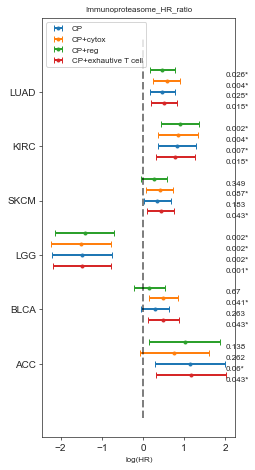

In [33]:
tt_list=['ACC','BLCA','LGG','SKCM','KIRC','LUAD']

df_tmp_immuno=df_tmp_immuno.sort_values(by=['coef'])
df_tmp_immuno=df_tmp_immuno.loc[tt_list]
df_tmp_immuno['y_value']=np.array(range(1,7))

df_tmp_immuno_cytox=df_tmp_immuno_cytox.reindex(df_tmp_immuno.index)
df_tmp_immuno_cytox=df_tmp_immuno_cytox.loc[tt_list]
df_tmp_immuno_cytox['y_value']=np.array(range(1,7))

df_tmp_immuno_reg=df_tmp_immuno_reg.reindex(df_tmp_immuno.index)
df_tmp_immuno_reg=df_tmp_immuno_reg.loc[tt_list]
df_tmp_immuno_reg['y_value']=np.array(range(1,7))

df_tmp_immuno_Exhausted_T_cell_score=df_tmp_immuno_Exhausted_T_cell_score.reindex(df_tmp_immuno.index)
df_tmp_immuno_Exhausted_T_cell_score=df_tmp_immuno_Exhausted_T_cell_score.loc[tt_list]
df_tmp_immuno_Exhausted_T_cell_score['y_value']=np.array(range(1,7))


x = np.array(df_tmp_immuno['coef'])
y = np.array(df_tmp_immuno['y_value'])
err=np.array(df_tmp_immuno['error_bar'])
y_ticks_labels = list(df_tmp_immuno.index)
l1 = np.arange(1,7,1)

x_1 = np.array(df_tmp_immuno_cytox['coef'])
y_1 = np.array(df_tmp_immuno_cytox['y_value'])
y_1=y_1+0.20
err_1=np.array(df_tmp_immuno_cytox['error_bar'])
y_ticks_labels_1 = list(df_tmp_immuno_cytox.index)
l1_1 = np.arange(1,7,1)

x_2 = np.array(df_tmp_immuno_reg['coef'])
y_2 = np.array(df_tmp_immuno_reg['y_value'])
y_2=y_2+0.40
err_2=np.array(df_tmp_immuno_reg['error_bar'])
y_ticks_labels_2 = list(df_tmp_immuno_reg.index)
l1_2 = np.arange(1,7,1)

x_3 = np.array(df_tmp_immuno_Exhausted_T_cell_score['coef'])
y_3 = np.array(df_tmp_immuno_Exhausted_T_cell_score['y_value'])
y_3=y_3-0.20
err_3=np.array(df_tmp_immuno_Exhausted_T_cell_score['error_bar'])
y_ticks_labels_3 = list(df_tmp_immuno_Exhausted_T_cell_score.index)
l1_3 = np.arange(1,7,1)

sns.set_style("ticks")
#sns.set_style (" ticks ")
fig, (ax1) = plt.subplots(1,1,figsize=(4, 7))

ax1.errorbar(x, y, xerr=err, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='CP') ## immuno
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(6):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(2,y[i]-0.118),fontsize=8)
    
ax1.errorbar(x_1, y_1, xerr=err_1, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='CP+cytox') ## immuno adjusted for cytox
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno_cytox
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(6):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(2,y_1[i]-0.118),fontsize=8)

ax1.errorbar(x_2, y_2, xerr=err_2, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='CP+reg') ## immuno adjusted for regulatory
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno_reg
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(6):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(2,y_2[i]-0.118),fontsize=8)


ax1.errorbar(x_3, y_3, xerr=err_3, fmt='.',elinewidth=2,solid_capstyle='projecting', capsize=3,label='CP+exhautive T cell') ## Immuno adjusted for Exhaustive T cell
ax1.legend(loc='upper left')
df_tmp_immuno_1=df_tmp_immuno_Exhausted_T_cell_score
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']<0.1,'significance_value']='*'
#df_tmp_immuno_1.loc[(df_tmp_immuno_1['p']<0.05)&(df_tmp_immuno_1['p']>0.01),'significance_value']='*'
df_tmp_immuno_1.loc[df_tmp_immuno_1['p_adjust']>0.1,'significance_value']=''
for i in range(6):
    ax1.annotate(str(round(df_tmp_immuno_1['p_adjust'][i],3))+df_tmp_immuno_1['significance_value'][i],xy=(2,y_3[i]-0.118),fontsize=8)

ax1.plot([0, 0], [0, 7], color = 'black', linewidth = 2.0,alpha=0.5,linestyle="dashed")
ax1.set_yticks(l1)
ax1.set_yticklabels(y_ticks_labels, rotation='horizontal',fontsize=10)
ax1.set_title('Immunoproteasome_HR_ratio')
ax1.set_xlabel('log(HR)')
plt.xticks(fontsize=10)
fig.tight_layout(pad=3.0)
ax1.grid(False)

#plt.savefig("/workspace/projects/immunoproteasome/plots/"+'Cox_proportional_hazard_ratio_immune_cytox_reg_exhaustive_score_all_combined_CP'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()